## Sentiment Analysis of Tweets on the 2019 Hong Kong Protest Movement 

In this pet project, an end-to-end sentiment analysis was performed on twitter tweets regarding the 2019 Hong Kong Protest Movement. We want to gain a better understanding of the sentiments on this social media platform using data science and machine learning techniques. Specifically, we want to find out what is the sentiment towards the Hong Kong Government and Police that are at the center of this mess. A positive sentiment would mean that a particular tweet supports the Hong Kong Government and/or Police, whereas a negative one would indicate the opposite.

The beginning of this notebook will focus on scraping twitter tweets that are dated from 25th October 2019 onwards. We will then clean up the tweets and do some word processing procedures so that the dataset can be used for subsequent data visualization and model training.
References:
- https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed
- https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf

In [1]:
# tweetcreated_at = 8 hours time difference. SG local time is 8hrs ahead. Take note.

### Import Libraries

In [2]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Import Dataset
The .csv files each contains 15k tweets and the search parameters used are stated below:
1. search_words = "#hongkong OR #hkprotests OR #freehongkong OR #hongkongprotests OR #hkpolicebrutality OR #antichinazi OR #standwithhongkong OR #hkpolicestate OR #HKpoliceterrorist OR #standwithhk OR #hkpoliceterrorism"
2. date_since = ["2019-10-28","2019-10-29","2019-10-30"]

In [3]:
tweets_1st = pd.read_csv(os.getcwd() + '/data/raw' + '/20191103_131218_sahkprotests_tweets.csv')
tweets_2nd = pd.read_csv(os.getcwd() + '/data/raw' + '/20191103_153932_sahkprotests_tweets.csv')
tweets_3rd = pd.read_csv(os.getcwd() + '/data/raw' + '/20191105_010011_sahkprotests_tweets.csv')
tweets_4th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191105_222815_sahkprotests_tweets.csv')
tweets_5th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191107_000333_sahkprotests_tweets.csv')
tweets_6th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191108_001436_sahkprotests_tweets.csv')
tweets_7th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191109_030106_sahkprotests_tweets.csv')
tweets_8th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191109_120954_sahkprotests_tweets.csv')
tweets_9th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191110_021422_sahkprotests_tweets.csv', engine='python')
tweets_10th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191110_134433_sahkprotests_tweets.csv', engine='python')
tweets_11th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191111_223912_sahkprotests_tweets.csv', engine='python')
tweets_12th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191112_231846_sahkprotests_tweets.csv', engine='python')
tweets_13th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191113_225544_sahkprotests_tweets.csv', engine='python')
tweets_14th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191115_000508_sahkprotests_tweets.csv', engine='python')
tweets_15th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191116_121136_sahkprotests_tweets.csv', engine='python')
tweets_16th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191117_001011_sahkprotests_tweets.csv', engine='python')
tweets_17th = pd.read_csv(os.getcwd() + '/data/raw' + '/20191120_015710_sahkprotests_tweets.csv', engine='python')

In [4]:
# Shape of dataset
print('Size of 1st set is:', tweets_1st.shape)
print('Size of 2nd set is:', tweets_2nd.shape)
print('Size of 3rd set is:', tweets_3rd.shape)
print('Size of 4th set is:', tweets_4th.shape)
print('Size of 5th set is:', tweets_5th.shape)
print('Size of 6th set is:', tweets_6th.shape)
print('Size of 7th set is:', tweets_7th.shape)
print('Size of 8th set is:', tweets_8th.shape)
print('Size of 9th set is:', tweets_9th.shape)
print('Size of 10th set is:', tweets_10th.shape)
print('Size of 11th set is:', tweets_11th.shape)
print('Size of 12th set is:', tweets_12th.shape)
print('Size of 13th set is:', tweets_13th.shape)
print('Size of 14th set is:', tweets_14th.shape)
print('Size of 15th set is:', tweets_15th.shape)
print('Size of 16th set is:', tweets_16th.shape)
print('Size of 17th set is:', tweets_17th.shape)

Size of 1st set is: (15000, 11)
Size of 2nd set is: (15000, 11)
Size of 3rd set is: (15000, 11)
Size of 4th set is: (15001, 11)
Size of 5th set is: (15000, 11)
Size of 6th set is: (15000, 11)
Size of 7th set is: (15000, 11)
Size of 8th set is: (15000, 11)
Size of 9th set is: (15001, 11)
Size of 10th set is: (15001, 11)
Size of 11th set is: (15000, 11)
Size of 12th set is: (15000, 11)
Size of 13th set is: (15000, 11)
Size of 14th set is: (15000, 11)
Size of 15th set is: (15000, 11)
Size of 16th set is: (15000, 11)
Size of 17th set is: (15000, 11)


In [5]:
# Summary statistics
print(tweets_1st.info())
print('\n')
print(tweets_2nd.info())
print('\n')
print(tweets_3rd.info())
print('\n')
print(tweets_4th.info())
print('\n')
print(tweets_5th.info())
print('\n')
print(tweets_6th.info())
print('\n')
print(tweets_7th.info())
print('\n')
print(tweets_8th.info())
print('\n')
print(tweets_9th.info())
print('\n')
print(tweets_10th.info())
print('\n')
print(tweets_11th.info())
print('\n')
print(tweets_12th.info())
print('\n')
print(tweets_13th.info())
print('\n')
print(tweets_14th.info())
print('\n')
print(tweets_15th.info())
print('\n')
print(tweets_16th.info())
print('\n')
print(tweets_17th.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
username          15000 non-null object
acctdesc          10515 non-null object
location          5694 non-null object
following         15000 non-null int64
followers         15000 non-null int64
totaltweets       15000 non-null int64
usercreatedts     15000 non-null object
tweetcreatedts    15000 non-null object
retweetcount      15000 non-null int64
text              15000 non-null object
hashtags          15000 non-null object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
username          15000 non-null object
acctdesc          10566 non-null object
location          5909 non-null object
following         15000 non-null int64
followers         15000 non-null int64
totaltweets       15000 non-null int64
usercreatedts     15000 non-null object
tweetcreatedts

In [6]:
# Concat the two dataset together:
data = pd.concat([tweets_1st, tweets_2nd, tweets_3rd, tweets_4th, tweets_5th, tweets_6th, tweets_7th,
                  tweets_8th, tweets_9th, tweets_10th, tweets_11th, tweets_12th, tweets_13th, tweets_14th,
                 tweets_15th, tweets_16th, tweets_17th], axis = 0)

print('Size of concatenated dataset is:', data.shape)

# Reset_index
data.reset_index(inplace = True, drop = True)
data.head()
print(data.info())

Size of concatenated dataset is: (255003, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255003 entries, 0 to 255002
Data columns (total 11 columns):
username          255003 non-null object
acctdesc          185076 non-null object
location          94066 non-null object
following         255000 non-null float64
followers         255000 non-null float64
totaltweets       255000 non-null object
usercreatedts     255000 non-null object
tweetcreatedts    255000 non-null object
retweetcount      255000 non-null object
text              255000 non-null object
hashtags          254997 non-null object
dtypes: float64(2), object(9)
memory usage: 21.4+ MB
None


### Checking for Duplicated Entries and Removing Them
Since we are performing the scraping close to each other, it is possible to scrape the same tweets as long as they fall within the search window of 7 days from the search_date.
We will remove these duplicated rows from our dataset.

In [7]:
# Check out the number of unique users in the dataset
# It can be seen that some users are more proactive on the social media platform than others.
data['username'].value_counts()

xzxzanalazy        651
belleng324         540
wdamidoinhere      399
natalie_hoyin      286
hky2147            264
                  ... 
LS_0301              1
LamSiuC              1
J3theWebDev          1
jinyi_whale          1
eastriverrunner      1
Name: username, Length: 51955, dtype: int64

In [8]:
# It is acceptable to have repeated username since they can tweet multiple times throughout the day.
data[data['username'] == 'Phy32833861']

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
10271,Phy32833861,NaN,NaN,7.0,7.0,418,2019-09-28 03:09:49,2019-11-03 04:24:41,12,@JoachimWatson @Treerisu @SolomonYue @HawleyMO...,[]
10292,Phy32833861,NaN,NaN,7.0,7.0,418,2019-09-28 03:09:49,2019-11-03 04:24:33,2,@JoachimWatson @SolomonYue @HawleyMO SOS! Plea...,"[{'text': 'StandWithHongKong', 'indices': [86,..."
10436,Phy32833861,NaN,NaN,7.0,7.0,418,2019-09-28 03:09:49,2019-11-03 04:23:16,15,More &amp; more cases like Hoi-lam Chan will h...,"[{'text': 'hkpolice', 'indices': [74, 83]}]"
10463,Phy32833861,NaN,NaN,7.0,7.0,418,2019-09-28 03:09:49,2019-11-03 04:23:04,34,This clip is a bit old but this happens on eve...,[]
10549,Phy32833861,NaN,NaN,7.0,7.0,418,2019-09-28 03:09:49,2019-11-03 04:22:28,2818,Arrestees ALL GIRLS. \nHard to believe they're...,"[{'text': 'HK', 'indices': [102, 105]}]"
...,...,...,...,...,...,...,...,...,...,...,...
71978,Phy32833861,NaN,NaN,11.0,9.0,1112,2019-09-28 03:09:49,2019-11-06 14:53:28,2,"@SenRickScott Other than interest, #ccp and it...","[{'text': 'ccp', 'indices': [56, 60]}, {'text'..."
72020,Phy32833861,NaN,NaN,11.0,9.0,1112,2019-09-28 03:09:49,2019-11-06 14:52:52,590,“The UK Government says that it is “fully comm...,[]
72062,Phy32833861,NaN,NaN,11.0,9.0,1112,2019-09-28 03:09:49,2019-11-06 14:52:07,378,"Top Pro-CCP figure in #HongKong, Junius Ho was...","[{'text': 'HongKong', 'indices': [39, 48]}]"
72153,Phy32833861,NaN,NaN,11.0,9.0,1112,2019-09-28 03:09:49,2019-11-06 14:50:59,132,Just like the pro-Beijing HK lawmaker Junius H...,"[{'text': '何君堯', 'indices': [62, 66]}]"


In [9]:
# Let's drop duplicated rows:
print('Initial size of dataset before dropping duplicated rows:', data.shape)
data.drop_duplicates(keep = False, inplace = True)

print('Current size of dataset after dropping duplicated rows, if any, is:', data.shape)
print(data.head())

Initial size of dataset before dropping duplicated rows: (255003, 11)
Current size of dataset after dropping duplicated rows, if any, is: (248652, 11)
          username                                           acctdesc  \
0     five5demands  HKer Fight for freedom 當獨裁成為事實 革命就是義務 #followb...   
1   Dejavu53328974  #followbackhongkong\n#StandwithHK\n#HKHumanRig...   
2         tsksimon                #FightForFreedom #StandWithHongKong   
3  JimmyWo67187904                                                NaN   
4         ARCHI418                                                NaN   

    location  following  followers totaltweets        usercreatedts  \
0        NaN      437.0      260.0         466  2019-10-05 13:40:37   
1  Hong Kong      581.0      360.0        7835  2019-08-27 15:47:34   
2        NaN      825.0      456.0        6728  2014-10-05 15:57:07   
3        NaN       22.0        1.0         656  2019-10-08 12:58:51   
4        NaN       19.0       11.0         121  2014-06

### Removing Non-English Words/Tokens

Since it might be possible to remove non-english words that are used in daily english conversations such as names etc, it might be better to filter by the chinese language.

##### Remove empty tweets first! 
If there are empty tweets or 'nan', the following codes will break

In [10]:
data.dropna(subset = ['text'], inplace = True)

In [11]:
# The unicode accounts for chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string

In [12]:
# Apply strip_chinese_words(...) on the column 'text'
data['text'] = data['text'].apply(lambda x: strip_chinese_words(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,five5demands,HKer Fight for freedom 當獨裁成為事實 革命就是義務 #followb...,NaN,437.0,260.0,466,2019-10-05 13:40:37,2019-11-03 02:57:49,292,Disgusting: Police in #HongKong are marking pr...,"[{'text': 'HongKong', 'indices': [36, 45]}]"
1,Dejavu53328974,#followbackhongkong\n#StandwithHK\n#HKHumanRig...,Hong Kong,581.0,360.0,7835,2019-08-27 15:47:34,2019-11-03 02:57:49,1315,#China-made teargas canister stuck in the road...,"[{'text': 'China', 'indices': [11, 17]}, {'tex..."
2,tsksimon,#FightForFreedom #StandWithHongKong,NaN,825.0,456.0,6728,2014-10-05 15:57:07,2019-11-03 02:57:49,105,This is only tiny bits of #HKPoliceBrutality.\...,"[{'text': 'HKPoliceBrutality', 'indices': [42,..."
3,JimmyWo67187904,NaN,NaN,22.0,1.0,656,2019-10-08 12:58:51,2019-11-03 02:57:48,660,A fireman complained to the #HongKongPolice fo...,"[{'text': 'HongKongPolice', 'indices': [41, 56]}]"
4,ARCHI418,NaN,NaN,19.0,11.0,121,2014-06-19 16:19:36,2019-11-03 02:57:46,0,#police threw a #Teargas hand #grenade. It bla...,"[{'text': 'police', 'indices': [0, 7]}, {'text..."


### Collect @Users mentioned in each tweet

We want to obtain this useful information from each tweet because it could allow us to analyse what are the popular figures in the protest movement.

In [13]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames


# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['text'].apply(lambda x: mentioned_users(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users
0,five5demands,HKer Fight for freedom 當獨裁成為事實 革命就是義務 #followb...,NaN,437.0,260.0,466,2019-10-05 13:40:37,2019-11-03 02:57:49,292,Disgusting: Police in #HongKong are marking pr...,"[{'text': 'HongKong', 'indices': [36, 45]}]",[]
1,Dejavu53328974,#followbackhongkong\n#StandwithHK\n#HKHumanRig...,Hong Kong,581.0,360.0,7835,2019-08-27 15:47:34,2019-11-03 02:57:49,1315,#China-made teargas canister stuck in the road...,"[{'text': 'China', 'indices': [11, 17]}, {'tex...",[@hkgetv]
2,tsksimon,#FightForFreedom #StandWithHongKong,NaN,825.0,456.0,6728,2014-10-05 15:57:07,2019-11-03 02:57:49,105,This is only tiny bits of #HKPoliceBrutality.\...,"[{'text': 'HKPoliceBrutality', 'indices': [42,...",[]
3,JimmyWo67187904,NaN,NaN,22.0,1.0,656,2019-10-08 12:58:51,2019-11-03 02:57:48,660,A fireman complained to the #HongKongPolice fo...,"[{'text': 'HongKongPolice', 'indices': [41, 56]}]",[]
4,ARCHI418,NaN,NaN,19.0,11.0,121,2014-06-19 16:19:36,2019-11-03 02:57:46,0,#police threw a #Teargas hand #grenade. It bla...,"[{'text': 'police', 'indices': [0, 7]}, {'text...",[]


### Main Text Cleaning
We had to remove chinese words and @users from our tweets first before we do the usual text cleaning and processing. Otherwise, we will not be able to obtain these information.

In [14]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [15]:
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)

In [16]:
# Apply function on the column 'text':
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
0,five5demands,HKer Fight for freedom 當獨裁成為事實 革命就是義務 #followb...,NaN,437.0,260.0,466,2019-10-05 13:40:37,2019-11-03 02:57:49,292,Disgusting: Police in #HongKong are marking pr...,"[{'text': 'HongKong', 'indices': [36, 45]}]",[],disgust police mark protestors pen write numbe...
1,Dejavu53328974,#followbackhongkong\n#StandwithHK\n#HKHumanRig...,Hong Kong,581.0,360.0,7835,2019-08-27 15:47:34,2019-11-03 02:57:49,1315,#China-made teargas canister stuck in the road...,"[{'text': 'China', 'indices': [11, 17]}, {'tex...",[@hkgetv],teargas canister stick road citizen try pull f...
2,tsksimon,#FightForFreedom #StandWithHongKong,NaN,825.0,456.0,6728,2014-10-05 15:57:07,2019-11-03 02:57:49,105,This is only tiny bits of #HKPoliceBrutality.\...,"[{'text': 'HKPoliceBrutality', 'indices': [42,...",[],tiny bit \nwe've protest month yet govn't stil...
3,JimmyWo67187904,NaN,NaN,22.0,1.0,656,2019-10-08 12:58:51,2019-11-03 02:57:48,660,A fireman complained to the #HongKongPolice fo...,"[{'text': 'HongKongPolice', 'indices': [41, 56]}]",[],fireman complain unnecessary firing tear gas l...
4,ARCHI418,NaN,NaN,19.0,11.0,121,2014-06-19 16:19:36,2019-11-03 02:57:46,0,#police threw a #Teargas hand #grenade. It bla...,"[{'text': 'police', 'indices': [0, 7]}, {'text...",[],threw hand blast citizen’s back make large are...


In [17]:
# Check out the shape again and reset_index
print(data.shape)
data.reset_index(inplace = True, drop = True)

# Check out data.tail() to validate index has been reset
data.tail()

(248651, 13)


,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
248646,zizihui1,"Five demands, not one less 🇭🇰#FollowBackHongKo...",Hong Kong,505.0,326.0,1301,2019-09-25 17:05:21,2019-11-19 17:19:37,72,@marcorubio CCP is sending PLA to Hong Kong al...,[],[@marcorubio],ccp send pla hong kong already use exactly tac...
248647,Candy96023268,#手足互科 #StandWithHongKong,Hong Kong,15.0,155.0,116,2019-09-12 06:32:09,2019-11-19 17:19:36,796,As violence continues to escalate in Hong Kong...,[],[],violence continue escalate hong kong cause fre...
248648,Vincent03231883,Hongkonger never surrender\n願榮光歸香港\n#followbac...,NaN,248.0,170.0,362,2019-09-28 14:29:13,2019-11-19 17:19:36,1162,“We call on Chief Exec. Carrie Lam to promote ...,[],[@SecPompeo],“we call chief exec carrie lam promote account...
248649,terryyipomni,Hongkonger 🇭🇰 Stand with Hong Kong! Fight for ...,Hong Kong,4653.0,2490.0,4627,2015-03-09 06:57:20,2019-11-19 17:19:36,9,"Huh excuse me😃, Hong Kong government lie again...","[{'text': 'SOSHK', 'indices': [74, 80]}, {'tex...",[],huh excuse hong kong government lie \n.\n\n
248650,lajiaer1,言論自由是一切自由之母。川普总统支持者；支持爆料革命；,NaN,348.0,45.0,5042,2019-06-01 23:58:30,2019-11-19 17:19:35,10,@y345a678 @YuriStoyanov I can’t stop crying wa...,[],"[@y345a678, @YuriStoyanov]",can’t stop cry watch clip show young protester...


### Process the Column 'hashtags'

In [18]:
# Import ast to convert a string representation of list to list
# The column 'hashtags' is affected
import ast

# Define a function to convert a string rep. of list to list
## Function should also handle NaN values after conversion
def strlist_to_list(text):
    
    # Remove NaN
    if pd.isnull(text) == True: # if true
        text = ''
    else:
        text = ast.literal_eval(text)
    
    return text

In [19]:
# Apply strlist_to_list(...) to the column 'hashtags'
# Note that doing so will return a list of dictionaries, where there will be one dictionary for each hashtag in a single tweet.
data['hashtags'] = data['hashtags'].apply(lambda x: strlist_to_list(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
0,five5demands,HKer Fight for freedom 當獨裁成為事實 革命就是義務 #followb...,NaN,437.0,260.0,466,2019-10-05 13:40:37,2019-11-03 02:57:49,292,Disgusting: Police in #HongKong are marking pr...,"[{'text': 'HongKong', 'indices': [36, 45]}]",[],disgust police mark protestors pen write numbe...
1,Dejavu53328974,#followbackhongkong\n#StandwithHK\n#HKHumanRig...,Hong Kong,581.0,360.0,7835,2019-08-27 15:47:34,2019-11-03 02:57:49,1315,#China-made teargas canister stuck in the road...,"[{'text': 'China', 'indices': [11, 17]}, {'tex...",[@hkgetv],teargas canister stick road citizen try pull f...
2,tsksimon,#FightForFreedom #StandWithHongKong,NaN,825.0,456.0,6728,2014-10-05 15:57:07,2019-11-03 02:57:49,105,This is only tiny bits of #HKPoliceBrutality.\...,"[{'text': 'HKPoliceBrutality', 'indices': [42,...",[],tiny bit \nwe've protest month yet govn't stil...
3,JimmyWo67187904,NaN,NaN,22.0,1.0,656,2019-10-08 12:58:51,2019-11-03 02:57:48,660,A fireman complained to the #HongKongPolice fo...,"[{'text': 'HongKongPolice', 'indices': [41, 56]}]",[],fireman complain unnecessary firing tear gas l...
4,ARCHI418,NaN,NaN,19.0,11.0,121,2014-06-19 16:19:36,2019-11-03 02:57:46,0,#police threw a #Teargas hand #grenade. It bla...,"[{'text': 'police', 'indices': [0, 7]}, {'text...",[],threw hand blast citizen’s back make large are...


In [20]:
# Since each 'hashtag' contain a list of dictionaries, we need to loop through the list to extract the actual hashtags in the tweets.
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags

In [21]:
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))

# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0                                           [hongkong]
1                                 [china, policestate]
2                                  [hkpolicebrutality]
3                                     [hongkongpolice]
4    [police, teargas, grenade, hkger, policestate,...
Name: hashtags, dtype: object


### Cleaning up the Column 'location'

In [22]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text

In [23]:
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))

# Check out the updated columns
print(data.head()['location'])

0          n.a
1    hong kong
2          n.a
3          n.a
4          n.a
Name: location, dtype: object


In [24]:
# Let's take a quick look at the value_counts()
data['location'].value_counts()

n.a                              157316
hong kong                         49093
香港                                 6829
united states                      1058
hk                                  912
                                  ...  
com em vallès no hi ha res...         1
foot of himalaya                      1
sipping coffee somewhere              1
█████████                             1
廣義開山里                                 1
Name: location, Length: 6218, dtype: int64

Unsurprisingly, most of the users are probably from HongKong. Slightly more than half of the users in this dataset did not reveal their locations.

### Cleaning up the Column 'acctdesc'

Likewise, we will clean up this column by removing NaN values and replacing them with 'n.a'.
For now, this is all we do to this column.

In [25]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['location']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))

# Check out the updated columns
print(data.head()['acctdesc'])

0    hker fight for freedom 當獨裁成為事實 革命就是義務 #followb...
1    #followbackhongkong\n#standwithhk\n#hkhumanrig...
2                  #fightforfreedom #standwithhongkong
3                                                  n.a
4                                                  n.a
Name: acctdesc, dtype: object


## Feature Engineering - Rule-based Word Processing
So far, we have removed duplicated rows, extract important information such as hashtags, mentioned users and users' locations, and also cleaned up the tweets in the previous section. In the coming section, we will focus on Rule-based word processing for our sentiment analysis. We will postpone some exploratory data visualization till later once we have all the ingredients.

### Generating Sentiments from Tweets with NLTK Vader_Lexicon Library
We will be using the Vader_lexicon library from NLTK to generate sentiment for each review. Vader uses lexicon of words to determine which words in the reviews are positive or negative. It will return a set of 4 scores on the positivity, negativity, neutrality of a text, and also an overall score whether a text is positive or negative.
1. Positivity - 'pos'
2. Negativity - 'neg'
3. Neutrality - 'neu'
4. Overall Score - 'compound'

In [26]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))

# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

#### Additional Features: no. of characters and no. of words

In [27]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))

# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))

# Check the new columns:
data.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text,neg,neu,pos,compound,numchars,numwords
248649,terryyipomni,hongkonger 🇭🇰 stand with hong kong! fight for ...,hong kong,4653.0,2490.0,4627,2015-03-09 06:57:20,2019-11-19 17:19:36,9,"Huh excuse me😃, Hong Kong government lie again...","[soshk, standwithhongkong, hongkongprotests]",[],huh excuse hong kong government lie \n.\n\n,0.000,0.794,0.206,0.0772,40,7
248650,lajiaer1,言論自由是一切自由之母。川普总统支持者；支持爆料革命；,n.a,348.0,45.0,5042,2019-06-01 23:58:30,2019-11-19 17:19:35,10,@y345a678 @YuriStoyanov I can’t stop crying wa...,[],"[@y345a678, @YuriStoyanov]",can’t stop cry watch clip show young protester...,0.378,0.458,0.163,-0.8176,141,22


#### Word Embeddings - Training Word2Vec using Gensim

Word embeddings involve the mapping of words in the corpus to numerical vectors, where similar words sharing similar contexts will have similar vectors as well. It will involve a shallow two-layer neural network that will train a matrix/tensor called the embedding matrix. By taking the matrix product of the embedding matrix and one-hot vector representation of each word in the corpus, we will arrive at the embedding vector.

We will be using Gensim - an open-source Python library - to generate doc2vec. <br/>

To confirm: apparently, doc2vec should be used over word2vec to obtain the vector representation of a 'document', in this case, our 'reviews' from the travellers. Word2vec will only give us the vector representation of a 'word'.

In [28]:
# Import the Gensim package
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data["cleaned_text"].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 10, window = 2, min_count = 1, workers = 4)

# Transform each document into a vector data
doc2vec_df = data["cleaned_text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data = pd.concat([data, doc2vec_df], axis = 1)

# Check out the newly added columns:
data.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,doc2vec_vector_5,doc2vec_vector_6,doc2vec_vector_7,doc2vec_vector_8,doc2vec_vector_9
248649,terryyipomni,hongkonger 🇭🇰 stand with hong kong! fight for ...,hong kong,4653.0,2490.0,4627,2015-03-09 06:57:20,2019-11-19 17:19:36,9,"Huh excuse me😃, Hong Kong government lie again...",...,-0.021183,-0.019724,-0.008041,0.057916,0.005414,-0.055156,0.090390,0.019608,-0.095140,-0.023267
248650,lajiaer1,言論自由是一切自由之母。川普总统支持者；支持爆料革命；,n.a,348.0,45.0,5042,2019-06-01 23:58:30,2019-11-19 17:19:35,10,@y345a678 @YuriStoyanov I can’t stop crying wa...,...,0.024503,-0.092746,0.057546,-0.056595,0.075753,0.086547,0.135315,-0.009363,-0.096228,-0.130499


#### TD-IDF Columns
Next, we will compute the TD-IDF of the reviews using the sklearn library. TD-IDF stands for Term Frequency-Inverse Document Frequency, which is used to reflect how important a word is to a document in a collection or corpus. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

1. Term Frequency - the number of times a term occurs in a document.
2. Inverse Document Frequency - an inverse document frequency factor that diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

Since NLTK does not support TF-IDF, we will use the tfidfvectorizer function from the Python sklearn library.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Call the function tfidfvectorizer
# min_df is the document frequency threshold for ignoring terms with a lower threshold.
# stop_words is the words to be removed from the corpus. We will check for stopwords again even though we had already performed it once previously.
# We will only consider a maximum of 100 features since in our previous runs.
tfidf = TfidfVectorizer(
    max_features = 100,
    min_df = 10,
    stop_words = 'english'
)

# Fit_transform our 'revi`ew' (the corpus) using the tfidf object from above
tfidf_result = tfidf.fit_transform(data['cleaned_text']).toarray()

# Extract the frequencies and store them in a temporary dataframe
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

# Rename the column names and index
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data.index

# Concatenate the two dataframes - 'dataset' and 'tfidf_df'
# Note: Axis = 1 -> add the 'tfidf_df' dataframe along the columns  or add these columns as columns in 'dataset'.
data = pd.concat([data, tfidf_df], axis = 1) 

# Check out the new 'dataset' dataframe
data.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,word_use,word_video,word_violence,word_vote,word_want,word_way,word_work,word_world,word_year,word_young
248649,terryyipomni,hongkonger 🇭🇰 stand with hong kong! fight for ...,hong kong,4653.0,2490.0,4627,2015-03-09 06:57:20,2019-11-19 17:19:36,9,"Huh excuse me😃, Hong Kong government lie again...",...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
248650,lajiaer1,言論自由是一切自由之母。川普总统支持者；支持爆料革命；,n.a,348.0,45.0,5042,2019-06-01 23:58:30,2019-11-19 17:19:35,10,@y345a678 @YuriStoyanov I can’t stop crying wa...,...,0.413149,0.0,0.397212,0.0,0.0,0.0,0.0,0.368334,0.0,0.458794


## Exploratory Data Analysis
Now that we have done most of the required feature engineering on the dataset, we try to visualize the data with data visualisation libraries - seaborn and matplotlib. 
### 1. WordCloud - What are the top trending or popular words used in this protest movement?

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['cleaned_text'])

<Figure size 2000x1500 with 1 Axes>

#### Expected Vocabulary 

Looking at the wordcloud, the only obvious word that has a strong negative connotation would be 'disgust', appearing at the bottom. Most of the remaining words thrown out align with what one has been seeing regularly on news and social media. From our wordcloud, we see that these words are - police, tear gas cannisters, protest, protestors etc. 

Outdated as more tweets are taken into consideration: Interestingly, 'good' appears in the wordcloud. But as of now, it still remains to be seen as to what or who is mentioned or associated numerously with 'good'. Let's see if we can find out more.

### 2. No. of Positive Sentiments vs No. of Negative Sentiments
Next, we look at what is the overall distribution of positive and negative tweets. Based on the SentimentIntensityAnalyzer from the NLTK Vader-Lexicon library, this analyzer examines the sentiment of a sentence, on how positive, neutral or negative it is. We can interpret the sentiment in the following manner. If a sentiment is positive, it could mean that it is pro-government and/or police. Whereas, a negative sentiment could mean that it is anti- government and/or police, and supportive towards the protesters.

The analyzer returns 4 scores for each sentence namely, 'positive', 'negative', 'neutral' and 'compound'. The score 'compound' returns the overall sentiment of a sentence with range of [-1, 1]. For our current purpose, we want to classify each tweet into 5 classes and assign a range of values for each of them:
1. Very positive '5' - [0.55, 1.00]
2. Positive '4' - [0.10, 0.55)
3. Neutral '3' - (-0.10, 0.10)
4. Negative '2' - (-0.55, -0.10]
5. Very negative '1' - [-1.00, -0.55]

Note: the range of values for a neutral sentiment is more stringent.

In [31]:
# Focus on 'compound' scores
# Create a new column called 'sentiment_class'
sentimentclass_list = []

for i in range(0, len(data)):
    
    # current 'compound' score:
    curr_compound = data.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)

# Add the new column 'sentiment_class' to the dataframe
data['sentiment_class'] = sentimentclass_list

# Check out the new column
data.tail()['sentiment_class']

248646    5
248647    2
248648    3
248649    3
248650    1
Name: sentiment_class, dtype: int64

In [32]:
# Verify if the classification assignment is correct:
data.iloc[0:5, :][['compound', 'sentiment_class']]

,compound,sentiment_class
0,0.2732,4
1,-0.1779,2
2,-0.8074,1
3,-0.7430,1
4,0.1779,4


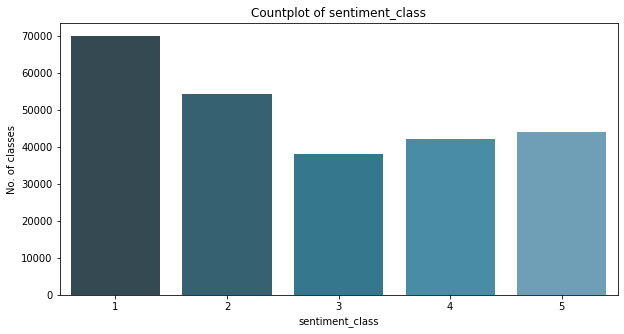

In [33]:
import seaborn as sns

# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.countplot(data['sentiment_class'])
plt.title('Countplot of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [34]:
# Display full text:
pd.set_option('display.max_colwidth', -1)

# Look at some examples of negative, neutral and positive tweets

# Filter 10 negative original tweets:
print("10 random negative original tweets and their sentiment classes:")
data[(data['sentiment_class'] == 1) | (data['sentiment_class'] == 2)].sample(n=10)[['text', 'sentiment_class']]

10 random negative original tweets and their sentiment classes:


,text,sentiment_class
86970,"This evil bill has long since been withdrawn, but obviously, pro-Beijing trash and CE Carrie Lam (also trash) will not let their loss go down easy, taking their bureaucratic revenge once again on these democratic lawmakers. #HKPoliceState #HKTotalitariangovernment https://t.co/cVlwOVedHO",1
22382,"According to StandNews, the casualty is a first aider. Two rounds of tear gas were aimed at journalists &amp; first aiders who were leaving the scene. There were no protesters. #HongKongProtests #PoliceBrutalityHK #PoliceState https://t.co/wpUCvSvIso",1
116368,HK is burning thanks to the violent HK prodemocracy rioters. Tuen Mun\n#HongKongProtests #HongKongProtesters #ViolentHKprotesters #stophkriots https://t.co/HSqXu2SdB2,2
241753,"[English Subtitle Available]\n\nAn arrestee in #PolyU successfully live-streamed the process of arrest, recording #HKPolice uttering death threats, and pepper-spraying them while they were detained. \n\n#SOSHK\n#StandwithHK \n#HongKongProtests https://t.co/2XfJybwHP8",1
47566,A young student in #HongKong has just lost his life due to injuries sustained while fleeing the police's indiscriminate firing of tear gas. Nothing but respect for the people all over the world putting their lives on the line for a free world #StandwithHK https://t.co/IijReiMaUU,1
14693,"According to StandNews, the casualty is a first aider. Two rounds of tear gas were aimed at journalists &amp; first aiders who were leaving the scene. There were no protesters. #HongKongProtests #PoliceBrutalityHK #PoliceState https://t.co/wpUCvSvIso",1
51443,A Ming Pao reporter appears to have been slightly injured after the police shot at journalists with water cannon. Protesters have long since left Chatham Road South by 9pm.\n\nPhoto: RTHK screenshot. #hongkong https://t.co/MRU5qmf34R,2
119012,"Sai Wan Ho #HongKong. Residents said they just wanted to go home. #Police argued with the crowd &amp; lost control, almost leaped at a man. Later on cops ran after &amp; arrested a man in white shirt while pepper-sprayed others, when crowd was seen dispersing. #PoliceState \n\n@cityusucbc https://t.co/F2dm1Wptrg",1
190574,"#HongKongPolice jumping over ticket gates of #MTR station.\n\n#CarrieLam said #HongKongPolice are here to ""maintain law and order""...\n\n...they're not paying for #MTR tickets tho.\n\n#HongKong\n#HongKongProtests https://t.co/HIIZfW88VV",2
206485,"Tiananmen Square Massacre 2.0\nThe government and polices are trying to kill all the students. On 12th November, they shot 2356 tear gases! You can see area in purple is the CUHK and it is very emergency! There are many animals inside and some birds dead! #StandWithHongKong #SOSHK https://t.co/8v60Jj6M13 https://t.co/mq3NYRlcRy",1


In [35]:
# Filter 10 neutral original tweets:
print("10 random neutral original tweets and their sentiment classes:")
data[(data['sentiment_class'] == 3)].sample(n=10)[['text', 'sentiment_class']]

10 random neutral original tweets and their sentiment classes:


,text,sentiment_class
31386,#092 Gastly don’t need no mask #pokemonforHK @uwu_uwu_mo @hkwuliff #StandWithHongKong https://t.co/hyUWGuuw3h,3
143334,Officer dashed and pepper sprayed citizens who were just standing\nSource - BarryMa TV\n#HongKongRioters #PoliceBrutality #PoliceState #StandWithHongKong #FreeHongKong #FightForFreedom #5DemandsNot1Less #police #HongKongPolice #HongKongPoliceTerrorism https://t.co/Q7ZHqXJV1n,3
128820,A sea of light at Tamar Park. #HongKongProtests https://t.co/WaYU1faSdH,3
72065,We are working with everyone to pass our #HongKong bill but we aren’t going to let anyone run out the clock on us\n\nAt some point very soon it will be time to act\n\nOne way or another we will have a vote &amp; those who oppose it will have to explain why\n\n https://t.co/9qOEGvJpLi,3
237807,@Kennedy_J123 @Y_LHongKonger #hkpoliceterrorist = mobs,3
6950,This is why the Senate should vote on the Hong Kong Human Rights &amp; Democracy Act - and my Be Water Act - now #StandWithHongKong #HongKong https://t.co/DokQaccB2d,3
106121,Lunch break in Central. These are not the typical young protesters. You're looking at people in dress shirts and business attire speaking up against #HKPolice during their lunch hour in memory of Chow\n\n#StandWithHongKong #HongKongProtests https://t.co/wRqW4THqMS,3
4355,This is why the Senate should vote on the Hong Kong Human Rights &amp; Democracy Act - and my Be Water Act - now #StandWithHongKong #HongKong https://t.co/DokQaccB2d,3
155377,@RepMcGovern @senatemajldr Thanks Rep McGovern for raising the awareness on #HKHumanRightsandDemocracyAct.\n\nWe are facing human rights crisis and becoming police state. Please #StandwithHK,3
248441,“We call on Chief Exec. Carrie Lam to promote accountability by supplementing the Independent Police Complains Council review with an independent investigation into the protest-related incidents.” - @SecPompeo on the political unrest in #HongKong. READ: https://t.co/RZMCdcgLQN https://t.co/i00X8iM8ky,3


In [36]:
# Filter 20 positive original tweets:
print("20 random positive original tweets and their sentiment classes:")
data[(data['sentiment_class'] == 4) | (data['sentiment_class'] == 5)].sample(n=20)[['text', 'sentiment_class']]

20 random positive original tweets and their sentiment classes:


,text,sentiment_class
25088,Thanks Nottingham for standing with #HongKong 💪\n#StandWithHongKong https://t.co/68RjxTcLjH,4
90928,"My most important meeting today in the Danish Parliament: My meeting with the representative from the democratic movement in Hong Kong. Thank you, Mo, for meeting with me and my MP-colleague @khoenge plus @amnestydk. #StandWithHongKong #FiveDemandsNotOneLess #dkpol https://t.co/MKxoX72220",4
89015,"@joshrogin @SenSchumer @senatemajldr Thanks so much for #StandWithHongKong .The suitation in #HongKong is getting more serious,#hongkongpolicebrutality happen everyday, one university student lost his life today ,he was only 22. Please pass the act to #SOSHK https://t.co/mNFfXe37hP",4
69731,"Chris Patten, last governor of HK: China’s behaviour in HK “piece of authoritarian vandalism of a great city and its way of life.” World leaders need to “replace cringeing with values-based diplomacy” when it comes to China @unimelb #hongkong https://t.co/EZyFYymDW8",5
223246,"Dear foreigners, here are the ways to help stand with us. It wouldn’t take a long time. Please help Hong Kong\n#HongKongProtest\n#StandWithHongKong https://t.co/zIF9IFzyM7",5
56976,Speaking to parliamentarians this morning about an UK #HongKong Human Rights and Democracy Act. Lots of enthusiasm. UK based lawyers who love HK and want to help should DM me. #StandWithHongKong,5
214582,"I fully respect the decisions by our brothers and sisters at the forefront of #HongKongProtests.\n\nIf they decide to stay, we stay together and pour in supplies to support them.\n\nIf they decide to retreat, we evacuate every one of them and leave no one behind.\n\n#BeWater #HongKong https://t.co/95ybULJGMi https://t.co/j8JmQR3rO8",5
198182,I hope it will not be too late to #PassHKHumanRightsAndDemocracyAct. Many #HongKongers have gone through a lot and sacrificed lives and happiness for the days of freedom and democracy. Thank you for #StandwithHongKong. https://t.co/aeB4CdWZth,5
183018,"""Hey Popo, Congrats! You finally managed to go into university and work in Central"" - on a day #HKPolice tries to storm into univ campuses and again confronts protesters in Central financial district. #HKPoliceState https://t.co/g7xKBrFYeK",4
141611,"I’m excited to be coming to HK on Nov 14-19 to hear your brave stories and share them with Congress, the Trump Administration and the American people. #StandWithHK ⁦@Andychanhotin⁩ ⁦@FreedomHKG⁩ ⁦@Fight4HongKong⁩ ⁦@Stand_with_HK⁩ ⁦@HKWORLDCITY⁩ https://t.co/oe3mI9bJS7",5


It seems that the sentiment scores for sentences are not accurate to capture the sentiments of the tweets. Supposedly neutral tweets from above are negative, in which they are about liberating Hong Kong and against police brutality etc. On the other hand, the deal breaker comes from the supposedly positive tweets. A glance at the 20 positive tweets from above shows that they are all actually negative - pro-protesters and anti-government and China. 

#### Hence, this short exercise reveals a shortcoming in using a rule-based/lexicon-based model such as the SentimentIntensityAnalzyer from VADER Lexicon library. Since words contained in the tweets are measured against a pre-defined dictionary of positive and negative words, it fails to examine and take the context of the tweets into account. As a result, most of the 'positive' sentiment tweets could mean that they are showing support to the protesters and their cause, NOT to the Hong Kong government and/or China. 

### 3. Popularity of Hashtags

The tweets were scraped on the basis of pre-defined search term i.e. specific hashtags. However, the tweets can still contain other hashtags that are not defined in the search term. We want to see amongst this collection of scraped tweets, what are the most and least popular hashtags used by Twitter users in their tweets.

In [37]:
# the column data['hashtags'] returns a list of string(s) for each tweet.
# Build a list of all hashtags in the dataset

hashtag_list = []

for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
    
# Print out the list
print(hashtag_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

No. of hashtags used in 248651 tweets is 306161


In [39]:
# Now we have the list of hashtags, we can convert this into a simple DataFrame, which will be used for visualization.
df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)

print(df_hashtag.head())
print('Shape of df_hashtag is:', df_hashtag.shape)

            hashtags
0  hongkong         
1  china            
2  policestate      
3  hkpolicebrutality
4  hongkongpolice   
Shape of df_hashtag is: (306161, 1)


#### Basic Visualization: All-time top N hashtags used

               hashtags  counts
2142  hongkong           73039 
4041  standwithhongkong  18842 
2250  hongkongprotests   16316 
1988  hkpolice           11380 
4033  standwithhk        10084 
3955  soshk              9638  
2209  hongkongpolice     8653  
2034  hkpoliceterrorism  6711  
1024  cuhk               5587  
1459  fightforfreedom    5552  
2163  hongkongers        4903  
796   china              4834  
1592  freehongkong       4372  
2026  hkpolicestate      4308  
1994  hkpolicebrutality  3568  


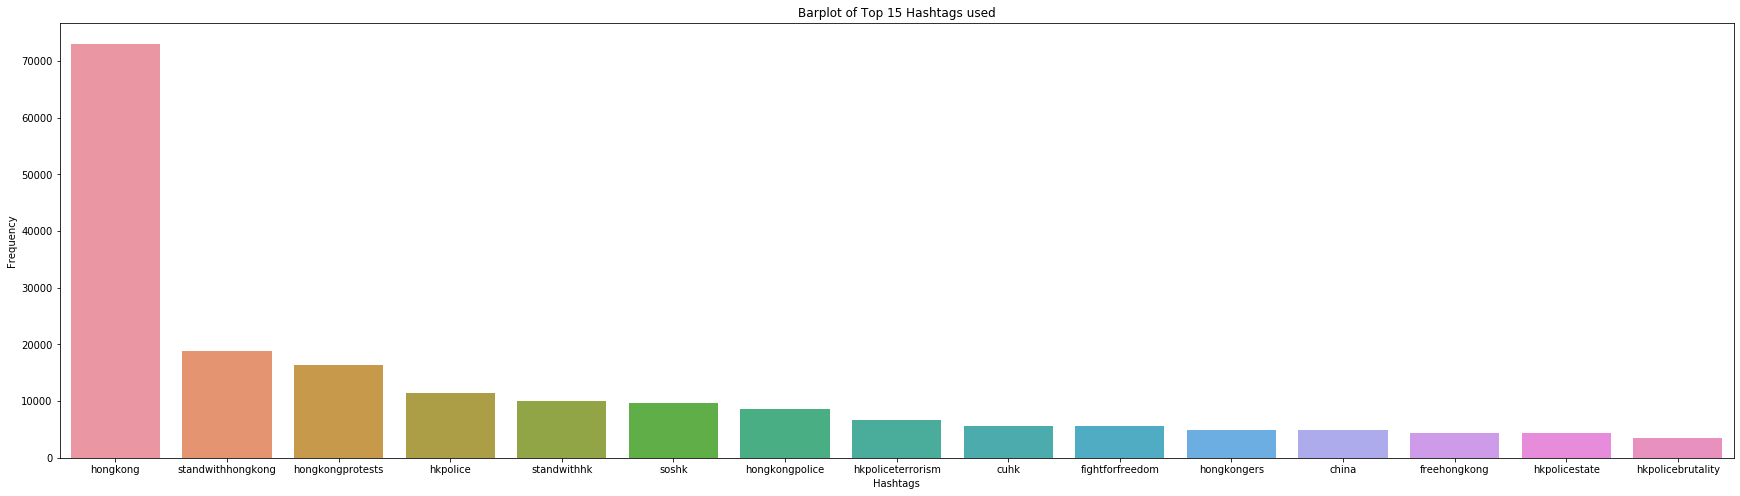

In [40]:
# The top 10 hashtags
N = 15
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)

# seaborn countplot on the top 30 hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

We can see that the top N hashtags are mostly showing support for the protesters instead of the Hong Kong Government and Police. 

#### Advanced: Time-series of Top N Hashtags
In this advanced section, we want to see the growth in usage of hashtags from 25th October 2019 onwards since tweets in dataframe are scraped from this date onwards.

Did one or few hashtags become more popular over time? Let's find out:

In [41]:
from datetime import datetime

ind_to_drop = []
date = []

# First find out which 'tweetcreatedts' is not a string or in other weird formats
for i in range(0, len(data)):
    ith_date_str = data.iloc[i,:]['tweetcreatedts']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    if ith_match == None:
        ind_to_drop.append(i)
    else:
        continue

In [42]:
# Drop these rows using ind_to_drop
data.drop(ind_to_drop, inplace = True)

In [43]:
# Check new shape
data.shape

(248648, 130)

In [44]:
# Create a new list of datetime date objects from the tweets:
for i in range(0, len(data)):
    ith_date_str = data.iloc[i, :]['tweetcreatedts']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    ith_date = datetime.strptime(ith_match.group(), '%Y-%m-%d').date()
    
    date.append(ith_date)
    
# Size of list 'date'
print('Len of date list: ', len(date))

Len of date list:  248648


In [45]:
# Append 'date' to dataframe 'data' as 'dt_date' aka 'datetime_date'
data['dt_date'] = date

In [46]:
data['dt_date'].value_counts()

2019-11-03    29892
2019-11-09    29133
2019-11-13    15000
2019-11-19    15000
2019-11-11    15000
2019-11-16    15000
2019-11-14    15000
2019-11-15    15000
2019-11-12    15000
2019-11-04    14644
2019-11-08    14422
2019-11-06    14398
2019-11-07    14184
2019-11-05    13624
2019-11-10    13351
Name: dt_date, dtype: int64

In [47]:
# Create a new dataframe first
timeseries_hashtags = pd.DataFrame(columns = ['hashtags', 'count', 'date', 'dayofnov'])

# Obtain a set of unique dates in 'date' list:
unique_date = np.unique(date)
print('Unique dates available in this dataset are:', unique_date)

Unique dates available in this dataset are: [datetime.date(2019, 11, 3) datetime.date(2019, 11, 4)
 datetime.date(2019, 11, 5) datetime.date(2019, 11, 6)
 datetime.date(2019, 11, 7) datetime.date(2019, 11, 8)
 datetime.date(2019, 11, 9) datetime.date(2019, 11, 10)
 datetime.date(2019, 11, 11) datetime.date(2019, 11, 12)
 datetime.date(2019, 11, 13) datetime.date(2019, 11, 14)
 datetime.date(2019, 11, 15) datetime.date(2019, 11, 16)
 datetime.date(2019, 11, 19)]


In [48]:
# Define a function to create a visualization of top N hashtags for T number of days
    
def visualize_top_hashtags(main_df, timeseries_df, N, T, unique_dates):
    # main_df - main dataframe 'data'
    # timeseries_df - a new and empty dataframe to store the top hashtags 
    # N - number of top hashtags to consider
    # T - number of days to consider
    # unique_dates - list of unique dates available in the table
    
    # Returns:
    # timeseries_df
    
    # Start counter to keep track of number of days already considered
    counter = 1

    # Starting from the latest date in the list
    for ith_date in reversed(unique_dates):
        # Check if counter exceeds the number of days required, T:
        if counter <= T:
            
            # Filter tweets created on this date:
            ith_date_df = main_df[main_df['dt_date'] == ith_date]

            # From this particular df, build a list of all possible hashtags:
            ith_hashtag_list = []

            for i in range(0, len(ith_date_df)):
                # Obtain the current list of hashtags:
                curr_hashtag = ith_date_df.iloc[i,:]['hashtags']

                # Extract and append the hashtags to 'hashtag_list':
                for j in range(0, len(curr_hashtag)):
                    ith_hashtag_list.append(curr_hashtag[j])

            # Convert the list into a simple DataFrame
            ith_df_hashtag = pd.DataFrame({
                    'hashtags': ith_hashtag_list
            })

            # Obtain top N hashtags:
            ith_top_hashtags = ith_df_hashtag.groupby(['hashtags']).size().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(N)

            # Add date as a column
            ith_top_hashtags['date'] = ith_date
            ith_top_hashtags['dayofnov'] = ith_date.day

            # Finally, concat this dataframe to timeseries_hashtags
            timeseries_df = pd.concat([timeseries_df, ith_top_hashtags], axis = 0)

            # Increase counter by 1
            counter += 1
        
        else: # break the for loop
            break
    
    print('The newly created timeseries_hashtag of size {} is: '.format(timeseries_df.shape))
    timeseries_df.reset_index(inplace = True, drop = True)
    
    # Visualization
    plt.figure(figsize=(28,12))
    ax = sns.barplot(x = 'hashtags', 
                   y = 'count',
                   data = timeseries_df,
                   hue = 'dayofnov')

    # plt.xticks(np.arange(3, 6, step=1))
    # Moving legend box outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # for legend text
    plt.setp(ax.get_legend().get_texts(), fontsize='22')
    # for legend title
    plt.setp(ax.get_legend().get_title(), fontsize='32') 
    plt.xlabel('Top Hashtags')
    plt.ylabel('Count of Hashtags')
    plt.title('Top ' + str(N) + ' Hashtags per day')
    sns.despine(left=True, bottom=True)
    plt.xticks(rotation = 45)
    plt.show()
    
    return timeseries_df

The newly created timeseries_hashtag of size (70, 4) is: 


/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 39321 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 28207 missing from current font.
  font.set_text(s, 0, flags=flags)


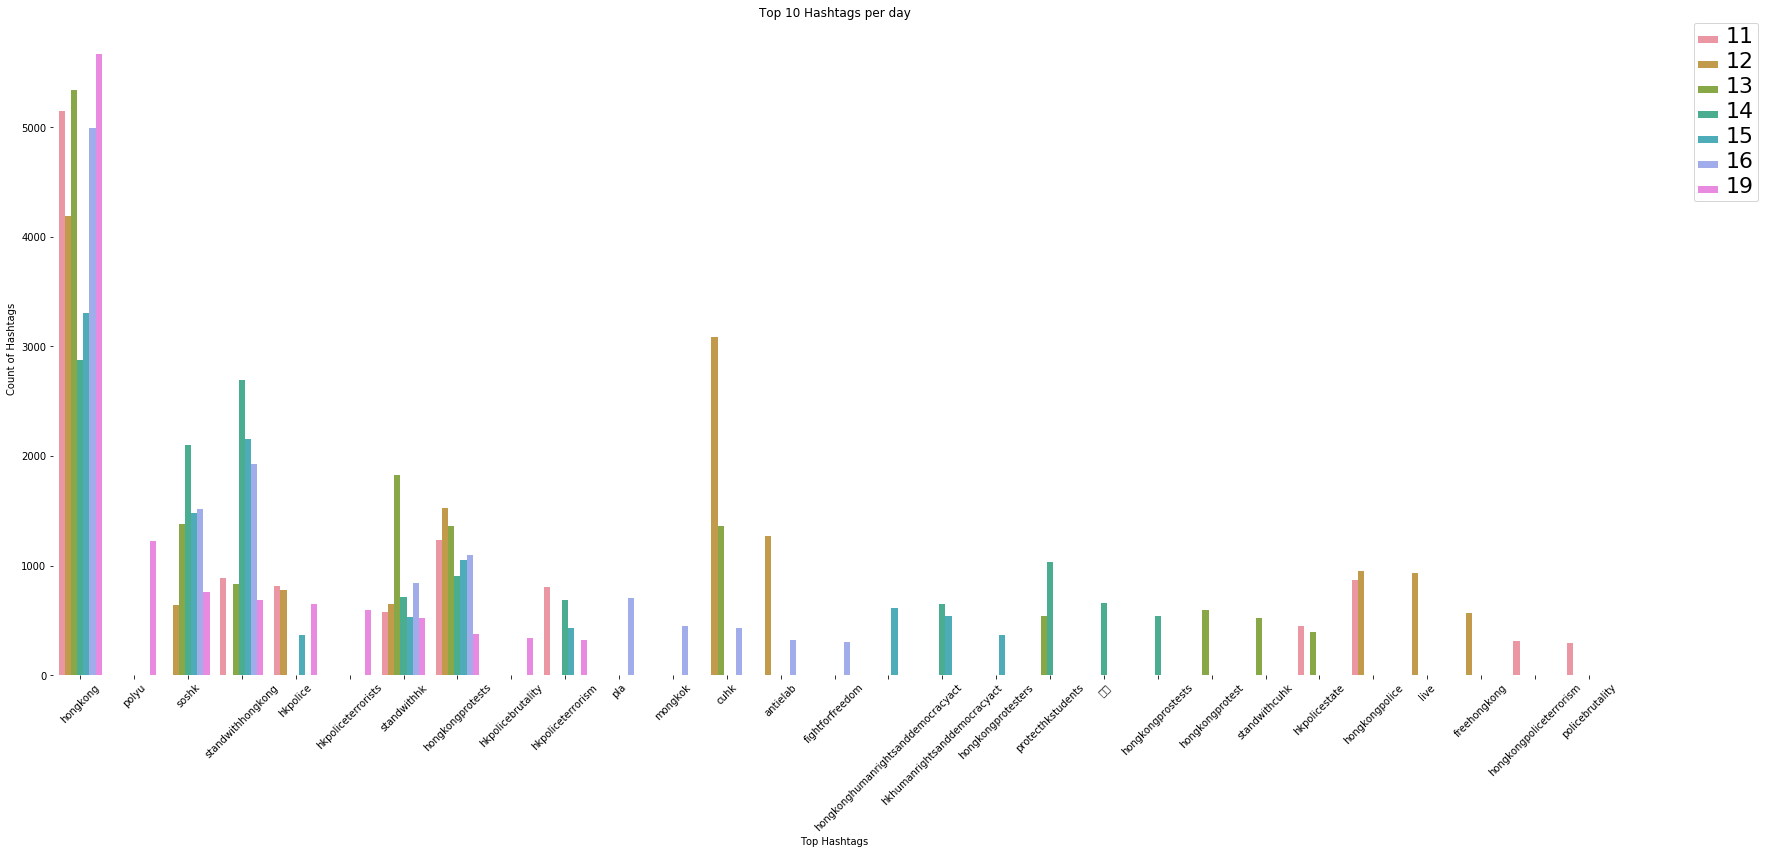

In [49]:
# Call function

timeseries_hashtags = visualize_top_hashtags(main_df = data,
                       timeseries_df = timeseries_hashtags,
                       N = 10,
                       T = 7,
                       unique_dates = unique_date)

The 'visualize_top_hashtags' function allows us to vary the top number of hashtags per day and the number of days to consider. e.g. we can consider the top 5 hashtags per day for the 2 latest dates in our dataset. A plot of top 10 hashtags per day for the past dates reveal that some hashtags - such as #hongkong, #hongkongprotests, #hongkongpolice, #standwithhongkong #hkpolice - are consistently used a lot. This could be because they are more generic in nature and hence, allowing people to easily search for related tweets using them.

On the other hand, we see that there are some hashtags that had a spike in usage - such as # blizzcon2019, #周梓樂 (rep. by squares in above graph), #hkust. These hashtags were used probably after specific events, as suggested by these hashtags, took place. It is expected that major incidents will trigger corresponding hashtags, other than the usual ones, to be used. Diving into these events, there are:
1. #blizzcon2019/blizzcon19 - https://www.scmp.com/tech/apps-social/article/3035987/will-blizzcon-become-latest-battleground-hong-kong-protests
2. #周梓樂 - https://www.bbc.com/news/world-asia-china-50343584
3. #hkust (related to #周梓樂) - https://www.hongkongfp.com/2019/11/08/hong-kong-students-death-prompts-fresh-anger-protests/
4. #japanese (A japanese was mistaken to be a mainland chinese and hence, was attacked by the protesters) - https://www3.nhk.or.jp/nhkworld/en/news/20191112_36/#:~:targetText=Hong%20Kong%20media%20reported%20on,take%20pictures%20of%20protest%20activities.
5. #antielab (protesters boycotting the elections because Joshua Wong was banned from it) - https://www.scmp.com/news/hong-kong/politics/article/3035285/democracy-activist-joshua-wong-banned-running-hong-kong

Finally, other hashtags are actually quite similar to the popular ones. They differ because some words in these hashtags are spelt out in full.
For example:
1. #hkpolice vs #hongkongpolice
2. #standwithhk vs #standwithhongkong
3. #hkpoliceterrorism vs #hkpoliceterrorists

### 4. Most Popular Tweets
In this section, we will focus on what are the most popular tweets around. There are 2 indicators that can help us achieve this - a tweet's retweet count and favorite count. Unfortunately, we managed to extract only the retweet count because there was some trouble in retrieving the favourite count from the mess of dictionaries in the .json format (Please feel free to tell me if you know how to do it!).

We will perform the following:
1. Top N tweets of all time (in this dataset only)
2. Top N tweets for particular day
3. Top N tweets for the past T days

#### Top N Tweets of All Time

In [50]:
# It turns out that some of the entries of 'retweetcount' is either in str or int
# We convert the data type of the column to all int using pd.to_numeric()
print('Current data type of "retweetcount" is:',data['retweetcount'].dtypes)
data['retweetcount'] = pd.to_numeric(arg = data['retweetcount'])
print('Current data type of "retweetcount" is:',data['retweetcount'].dtypes)

Current data type of "retweetcount" is: object
Current data type of "retweetcount" is: int64


In [51]:
# Check out the sorted dataframe
data.sort_values(by = ['retweetcount'], ascending = False).head(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,word_violence,word_vote,word_want,word_way,word_work,word_world,word_year,word_young,sentiment_class,dt_date
248148,BrianLe89224997,hongkonger🇭🇰,n.a,1.0,1.0,28,2019-11-17 16:56:44,2019-11-19 17:22:10,64205,The Chinese and #HongKong governments must immediately deescalate the situation and exercise restraint at #PolyU. More violence &amp; bloodshed will only make things worse.\n\nThe world is watching. #StandWithHongKong #DemocracyForHK,...,0.436332,0.0,0.0,0.0,0.0,0.40461,0.0,0.0,1,2019-11-19
235579,SzeNgaCindy1,a hongkonger😷\nmay glory be to hong kong 🇭🇰💛,n.a,44.0,14.0,116,2019-11-13 13:12:29,2019-11-19 15:26:53,64201,The Chinese and #HongKong governments must immediately deescalate the situation and exercise restraint at #PolyU. More violence &amp; bloodshed will only make things worse.\n\nThe world is watching. #StandWithHongKong #DemocracyForHK,...,0.436332,0.0,0.0,0.0,0.0,0.40461,0.0,0.0,1,2019-11-19


In [52]:
# Define a function that will pull out top N tweets of all time:
def alltime_top_tweets(df, N):
    # Arguments:
    # df - dataframe
    # N - top N tweets based on retweetcount
    
    # Sort according to 'retweetcount'
    top_tweets_df = df.sort_values(by = ['retweetcount'], ascending = False)
    # Drop also duplicates from the list, keep only the copy with higher retweetcount
    top_tweets_df.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
    # Keep only N rows
    top_tweets_df = top_tweets_df.head(N)
    
    # Print out only important details 
    # username, tweetcreatedts, retweetcount, original text 'text'
    return top_tweets_df[['username', 'tweetcreatedts', 'retweetcount', 'text']]  

In [53]:
# All-time top 10 tweets
print('All-time top 10 tweets:')
print('\n')
alltime_top_tweets(data, 10)

All-time top 10 tweets:




,username,tweetcreatedts,retweetcount,text
248148,BrianLe89224997,2019-11-19 17:22:10,64205,The Chinese and #HongKong governments must immediately deescalate the situation and exercise restraint at #PolyU. More violence &amp; bloodshed will only make things worse.\n\nThe world is watching. #StandWithHongKong #DemocracyForHK
36545,taterto66916070,2019-11-04 15:08:27,47503,Disturbing video taken in #Shenzhen just across the boarder with #HongKong. Something extraordinarily bad is about happen. #China #HongKongProtests #Democracy #SaveHongKong \nhttps://t.co/Gad5R5HVZL
161213,Sergio74409673,2019-11-12 13:28:02,34101,Sen Marco Rubio joined @foxandfriends this morning to discuss the situation in #HongKong. \n\nRT 🔃 if you agree it's time for Congress to pass Rubio's #HongKongHumanRightsandDemocracyAct https://t.co/JQD1tMyviy
248156,BrianLe89224997,2019-11-19 17:22:07,32209,"In #HongKong, government police continue their assault on universities into the night, making mass arrests and now threatening live fire against largely defenseless students. Beijing is pushing Hong Kong into a state of siege #StandWithHongKong https://t.co/88poKjgKt8"
229761,H45888752,2019-11-16 15:19:33,26585,RT to tell @SenateMajldr McConnell: bring the bipartisan Hong Kong Human Rights &amp; Democracy Act to the Senate Floor this week! #HongKongProtests #StandWithHongKong
238617,Mj201915,2019-11-19 15:49:04,25576,Great news. The #HKHumanRightsandDemocracyAct just hit the Senate hotline. Passage should be imminent. @marcorubio has been a champion on this and I’m proud to join him as cosponsor #StandWithHongKong
201418,yutung19401791,2019-11-14 15:41:54,24789,#HongKong police now raiding universities in the city - major new escalation from the Beijing backed government #HongKongProtests https://t.co/YpXKl77p81
218890,GarySo13,2019-11-16 13:52:08,23697,Hong Kong's youth protestors are kind. I post this clip to say thanks. @CBSrandy was rolling when the police fired tear gas at the group we were in. An umbrella and helmet were forced on me. I'll prob never know who they are but I'm so grateful for their care. #HongKongProtests https://t.co/NNAsFjpXOP
237523,Ka38413923,2019-11-19 15:52:31,22399,The United States proudly stands with the people of Hong Kong as they rightfully resist China’s Communist Regime. # #FreeHongKong https://t.co/8legnSDaVF
239244,haeq,2019-11-19 16:19:57,21143,Mainland #China soldiers appearing on #HongKong streets now. Bad development - Beijing about to escalate further? #HongKongProtests https://t.co/9MErNXkbHc


#### Top N tweets for a particular day

In [54]:
# Define another function as well
def specified_toptweets(df, spec_date, N):
    # Arguments
    # df - dataframe
    # N - top N tweets
    # date - enter particular date in str format i.e. '2019-11-02'
    
    # Specific date
    spec_date = datetime.strptime(spec_date, '%Y-%m-%d').date()
    
    # Filter df by date first
    date_df = df[df['dt_date'] == spec_date ]
    
    # Sort according to 'retweetcount'
    top_tweets_date_df = date_df.sort_values(by = ['retweetcount'], ascending = False)
    # Drop also duplicates from the list, keep only the copy with higher retweetcount
    top_tweets_date_df.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
    # Keep only N rows
    top_tweets_date_df = top_tweets_date_df.head(N)
    
    print('Top ' + str(N) + ' tweets for date ' + str(spec_date) + ' are:')
    # Print out only important details 
    # username, tweetcreatedts, retweetcount, original text 'text'
    return top_tweets_date_df[['username', 'tweetcreatedts', 'retweetcount', 'text']] 

In [55]:
# Try: top 10 tweets for 2019-11-05
specified_toptweets(data, '2019-11-05', 10)

Top 10 tweets for date 2019-11-05 are:


,username,tweetcreatedts,retweetcount,text
56313,flora30639385,2019-11-05 13:56:16,14866,"Outside the Kowloon mosque, Philip Khan condemn HK police and CE Carrie Lam in rage, saying the government is insulting Islam by spraying blue dye to the mosque using water cannon #HongKongProtests https://t.co/DTVf6DjzFo"
56394,bellenico1,2019-11-05 13:55:07,11038,"Man driving by in a Porsche was pulled out of his car and arrested by a dozen riot police, only for playing “Glory to Hong Kong” in his car.\n\nKid was asking the woman shooting the video : “Why was he arrested only for playing a song?”\n\n#HKPoliceState \n#StandWithHongKong https://t.co/qn4whKuacW"
48110,vkydfgtjgdvxcjy,2019-11-05 12:02:36,9126,Today I’m introducing new legislation to impose Global Magnitsky sanctions on Beijing officials &amp; their collaborators who seek to repress Hong Kong. The situation there is urgent. Proud to be joined by @SenRickScott &amp; @JohnCornyn #StandWithHongKong https://t.co/Owa6mMcjak
53045,r2wqn0p00t,2019-11-05 12:49:21,5591,BREAKING: Hong Kong bans activist Joshua Wong from standing in district election race https://t.co/J8b7RA2uON #HongKong #China #HongKongProtests #StandWithHK #antiELABhk #antiELAB @krislc @joshuawongcf @demosisto
56875,carbonwithhk,2019-11-05 13:48:26,5476,"Disturbing reports that Beijing is planning new steps to “safeguard national security” in #HongKong. If so, that will only make things worse.\n\n@Senatemajldr McConnell: bring the #HKHumanRightsandDemocracyAct to a vote as soon as possible to support #HK!\nhttps://t.co/CtAx5vr2Rj"
58114,IdaLi40260586,2019-11-05 13:27:57,5019,"After #HKPoliceTerrorists have arrested a #hkprotester tonight, his face was covered in blood. #PoliceBrutality #HKHumanRightsandDemocracyAct #StandWithHongKong https://t.co/tzjI6rwpYq"
56544,shortbr50041064,2019-11-05 13:52:52,4916,This is why the Senate should vote on the Hong Kong Human Rights &amp; Democracy Act - and my Be Water Act - now #StandWithHongKong #HongKong https://t.co/DokQaccB2d
53814,ethirica,2019-11-05 13:36:49,4496,Police officers have been filmed shoving a fireman around in Central after he complained they had shot tear gas straight at his truck. The officers also pepper sprayed a journalist who dared to report on the bust up. #HongKong\n\nhttps://t.co/rubbu7eQe2 https://t.co/Yt1FKU4BRm
57973,vycpwpeBfM4AJgg,2019-11-05 13:30:45,4485,"In Tai Po Megaball just now, a female citizen lost consciousness and police did not let First Aid treat her, but continued to drag her body on the ground! 😭😭😭 What crime did she commit to deserve this? Is being a HongKonger a crime? \n\n#HongKongProtests #PoliceBrutality #SOSHK https://t.co/1VVbkz6HZt"
57580,Sophie24842362,2019-11-05 13:37:54,4431,"#LIVE: The ambience at New Town Plaza has intensified again as police have attempted to storm into the mall a 2nd time today. The chaotic scene has led to an arrest of a few. In this footage, a cop covers a man’s face as he tries to shout out his name. #antiRLAB #HongKongProtests https://t.co/vRhNYhtgPR"


#### Top N tweets for the past T days

In [56]:
# Obtain the list of unique dates again
unique_date = np.unique(date)
print('Unique dates available in this dataset are:')
print(unique_date)

Unique dates available in this dataset are:
[datetime.date(2019, 11, 3) datetime.date(2019, 11, 4)
 datetime.date(2019, 11, 5) datetime.date(2019, 11, 6)
 datetime.date(2019, 11, 7) datetime.date(2019, 11, 8)
 datetime.date(2019, 11, 9) datetime.date(2019, 11, 10)
 datetime.date(2019, 11, 11) datetime.date(2019, 11, 12)
 datetime.date(2019, 11, 13) datetime.date(2019, 11, 14)
 datetime.date(2019, 11, 15) datetime.date(2019, 11, 16)
 datetime.date(2019, 11, 19)]


In [57]:
# Define another function, which is similar to the one from above 'visualize_top_hashtags':

def past_toptweets(df, T, N, unique_date):
    # Arguments:
    # df - dataframe 'data'
    # T - last T days 
    # N - top N tweets
    # List of all unique dates in dataset
    
    # Create a df to store top tweets for all T dates, in case there is a need to manipulate this df
    past_toptweets_df = pd.DataFrame(columns = ['username', 'tweetcreatedts', 'retweetcount', 'text'])
    print(past_toptweets_df)
    
    # Filter data according to last T dates first:
    # Do a check that T must not be greater than the no. of elements in unique_date
    if T <= len(unique_date):
        unique_date = unique_date[-T:] # a list
    else:
        raise Exception('T must be smaller than or equal to the number of dates in the dataset!')
    
    # Print out top N for each unique_date one after another, starting from the latest:
    for ith_date in reversed(unique_date):
        # Filter tweets created on this date:
        ith_date_df = df[df['dt_date'] == ith_date]
        
        # Sort according to 'retweetcount'
        top_tweets_date_df = ith_date_df.sort_values(by = ['retweetcount'], ascending = False)
        # Drop also duplicates from the list, keep only the copy with higher retweetcount
        top_tweets_date_df.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
        # Keep only N rows
        top_tweets_date_df = top_tweets_date_df.head(N)
        # Keep only essential columns
        top_tweets_date_df = top_tweets_date_df[['username', 'tweetcreatedts', 'retweetcount', 'text']]
        
        # Append top_tweets_date_df to past_toptweets_df
        past_toptweets_df = pd.concat([past_toptweets_df, top_tweets_date_df], axis = 0)
        
        # Print out the top tweets for this ith_date
        print('Top ' + str(N) + ' tweets for date ' + str(ith_date) + ' are:')
        # print only essential columns:
        print(top_tweets_date_df)
        print('\n')
    
    return past_toptweets_df

In [58]:
past_toptweets(data, T = 5, N = 2, unique_date = unique_date)

Empty DataFrame
Columns: [username, tweetcreatedts, retweetcount, text]
Index: []
Top 2 tweets for date 2019-11-19 are:
               username       tweetcreatedts  retweetcount  \
248148  BrianLe89224997  2019-11-19 17:22:10  64205          
248156  BrianLe89224997  2019-11-19 17:22:07  32209          

                                                                                                                                                                                                                                                                                text  
248148  The Chinese and #HongKong governments must immediately deescalate the situation and exercise restraint at #PolyU. More violence &amp; bloodshed will only make things worse.\n\nThe world is watching. #StandWithHongKong #DemocracyForHK                                     
248156  In #HongKong, government police continue their assault on universities into the night, making mass arrests and now threatening 

,username,tweetcreatedts,retweetcount,text
248148,BrianLe89224997,2019-11-19 17:22:10,64205,The Chinese and #HongKong governments must immediately deescalate the situation and exercise restraint at #PolyU. More violence &amp; bloodshed will only make things worse.\n\nThe world is watching. #StandWithHongKong #DemocracyForHK
248156,BrianLe89224997,2019-11-19 17:22:07,32209,"In #HongKong, government police continue their assault on universities into the night, making mass arrests and now threatening live fire against largely defenseless students. Beijing is pushing Hong Kong into a state of siege #StandWithHongKong https://t.co/88poKjgKt8"
229761,H45888752,2019-11-16 15:19:33,26585,RT to tell @SenateMajldr McConnell: bring the bipartisan Hong Kong Human Rights &amp; Democracy Act to the Senate Floor this week! #HongKongProtests #StandWithHongKong
232997,NovaJK6,2019-11-16 15:39:35,25504,Great news. The #HKHumanRightsandDemocracyAct just hit the Senate hotline. Passage should be imminent. @marcorubio has been a champion on this and I’m proud to join him as cosponsor #StandWithHongKong
218476,mlcdu,2019-11-15 16:28:22,24707,Great news. The #HKHumanRightsandDemocracyAct just hit the Senate hotline. Passage should be imminent. @marcorubio has been a champion on this and I’m proud to join him as cosponsor #StandWithHongKong
216370,c_079ty,2019-11-15 16:40:58,21667,The United States proudly stands with the people of Hong Kong as they rightfully resist China’s Communist Regime. # #FreeHongKong https://t.co/8legnSDaVF
203264,Vickiehooo,2019-11-14 15:38:06,26185,RT to tell @SenateMajldr McConnell: bring the bipartisan Hong Kong Human Rights &amp; Democracy Act to the Senate Floor this week! #HongKongProtests #StandWithHongKong
201418,yutung19401791,2019-11-14 15:41:54,24789,#HongKong police now raiding universities in the city - major new escalation from the Beijing backed government #HongKongProtests https://t.co/YpXKl77p81
188015,lin_tenny,2019-11-13 14:29:19,26030,RT to tell @SenateMajldr McConnell: bring the bipartisan Hong Kong Human Rights &amp; Democracy Act to the Senate Floor this week! #HongKongProtests #StandWithHongKong
188088,1Kekster,2019-11-13 14:29:10,24574,#HongKong police now raiding universities in the city - major new escalation from the Beijing backed government #HongKongProtests https://t.co/YpXKl77p81


One flaw of this function 'past_toptweets' is that it could return tweets that are identical. For instance, a popular tweet on day 1 can be retweeted again on subsequent days by other users. This function can then pick up such tweets because no logic is implemented as of now to consider only tweets that have not been chosen from earlier dates.

### 5. Behavior of Twitter Users

#### No. of Tweets Daily
Next, we want to know who are the users who have been relatively more active in tweeting tweets related to the protests.

In [59]:
top_user_df = pd.DataFrame(columns = ['username', 'noTweets', 'noFollowers', 'dt_date'])

# Convert datatype of 'totaltweets' to numeric
pd.to_numeric(data['totaltweets'])

for ith_date in unique_date:
    print('Current loop: ', ith_date)
    
    temp = data[data['dt_date'] == ith_date]
    
    # pd.DataFrame - count number of tweets tweeted in that day - noTweets
    temp_noTweets = temp.groupby(['username']).size().reset_index(name = 'noTweets').sort_values(by = 'username', ascending = False)
    
    # pd.Series - count max followers - might fluctuate during the day
    temp_noFollowing = temp.groupby(['username'])['followers'].max().reset_index(name = 'noFollowers').sort_values(by = 'username', ascending = False)['noFollowers']
    
    # *** NOT WORKING
    # pd.Series - count max totaltweets - might fluctuate during the day. Note this is historical total number of tweets ever since the user is created.
    # temp_noTotaltweets = temp.groupby(['username'])['totaltweets'].max().reset_index(name = 'noTotaltweets').sort_values(by = 'username', ascending = False)['noTotaltweets']
    
    # Concat series to temp_noTweets, which will be the main df
    final = pd.concat([temp_noTweets, temp_noFollowing], axis = 1) # add as columns
    final['dt_date'] = ith_date
    
    print(final)
    
    # Append 'final' dataframe to top_user_df
    top_user_df = pd.concat([top_user_df, final])

Current loop:  2019-11-03
           username  noTweets  noFollowers     dt_date
9374  zzzqqq9999     10        171.0        2019-11-03
9373  zyxpcy3        2         0.0          2019-11-03
9372  zyx_yny        1         1741.0       2019-11-03
9371  zxlinux        1         3575.0       2019-11-03
9370  zxcvbnvbnvbnm  15        2.0          2019-11-03
...             ...  ..        ...                 ...
4     037hk1         2         70.0         2019-11-03
3     034angie1      3         47.0         2019-11-03
2     02468Hkers     2         10.0         2019-11-03
1     0203Thend      2         4.0          2019-11-03
0     007nash        6         55.0         2019-11-03

[9375 rows x 4 columns]
Current loop:  2019-11-04
             username  noTweets  noFollowers     dt_date
4490  zzxxcc11vv       1         4.0          2019-11-04
4489  zwzw_22          1         171.0        2019-11-04
4488  zwei55699        1         25.0         2019-11-04
4487  zukashooter      3         90

            username  noTweets  noFollowers     dt_date
5505  zzwvic          1         12.0         2019-11-15
5504  zxxlol_tyra     4         33.0         2019-11-15
5503  zukashooter     2         1783.0       2019-11-15
5502  zoomersrevenge  1         21.0         2019-11-15
5501  zombie_lai      1         230.0        2019-11-15
...          ...     ..           ...               ...
4     04Mystars       2         6.0          2019-11-15
3     0416lfh         5         315.0        2019-11-15
2     0308hker        4         147.0        2019-11-15
1     00HKer1         6         227.0        2019-11-15
0     001winnie001    1         11.0         2019-11-15

[5506 rows x 4 columns]
Current loop:  2019-11-16
          username  noTweets  noFollowers     dt_date
5878  zxdcvasdf     1         429.0        2019-11-16
5877  zwww69697391  5         428.0        2019-11-16
5876  zuosa11365    1         229.0        2019-11-16
5875  zukashooter   1         1821.0       2019-11-16
5874  z

In [60]:
print('Top_user_df is:')
print(top_user_df.head(10))

Top_user_df is:
           username noTweets  noFollowers     dt_date
9374  zzzqqq9999     10       171.0        2019-11-03
9373  zyxpcy3        2        0.0          2019-11-03
9372  zyx_yny        1        1741.0       2019-11-03
9371  zxlinux        1        3575.0       2019-11-03
9370  zxcvbnvbnvbnm  15       2.0          2019-11-03
9369  zxcv_73        1        434.0        2019-11-03
9368  zwzw_22        2        168.0        2019-11-03
9367  zukashooter    7        867.0        2019-11-03
9366  zu00743015     1        159.0        2019-11-03
9365  zsazsa99       1        738.0        2019-11-03


In [61]:
# # Standardize the columns 'noTweets' and 'noFollowers', so that the graphs will look proportionate
# from sklearn.preprocessing import MinMaxScaler
# MMscaler = MinMaxScaler()
# scaled_top_user_df = MMscaler.fit_transform(top_user_df[['noTweets', 'noFollowers']])
# top_user_df[['noTweets', 'noFollowers']] = scaled_top_user_df

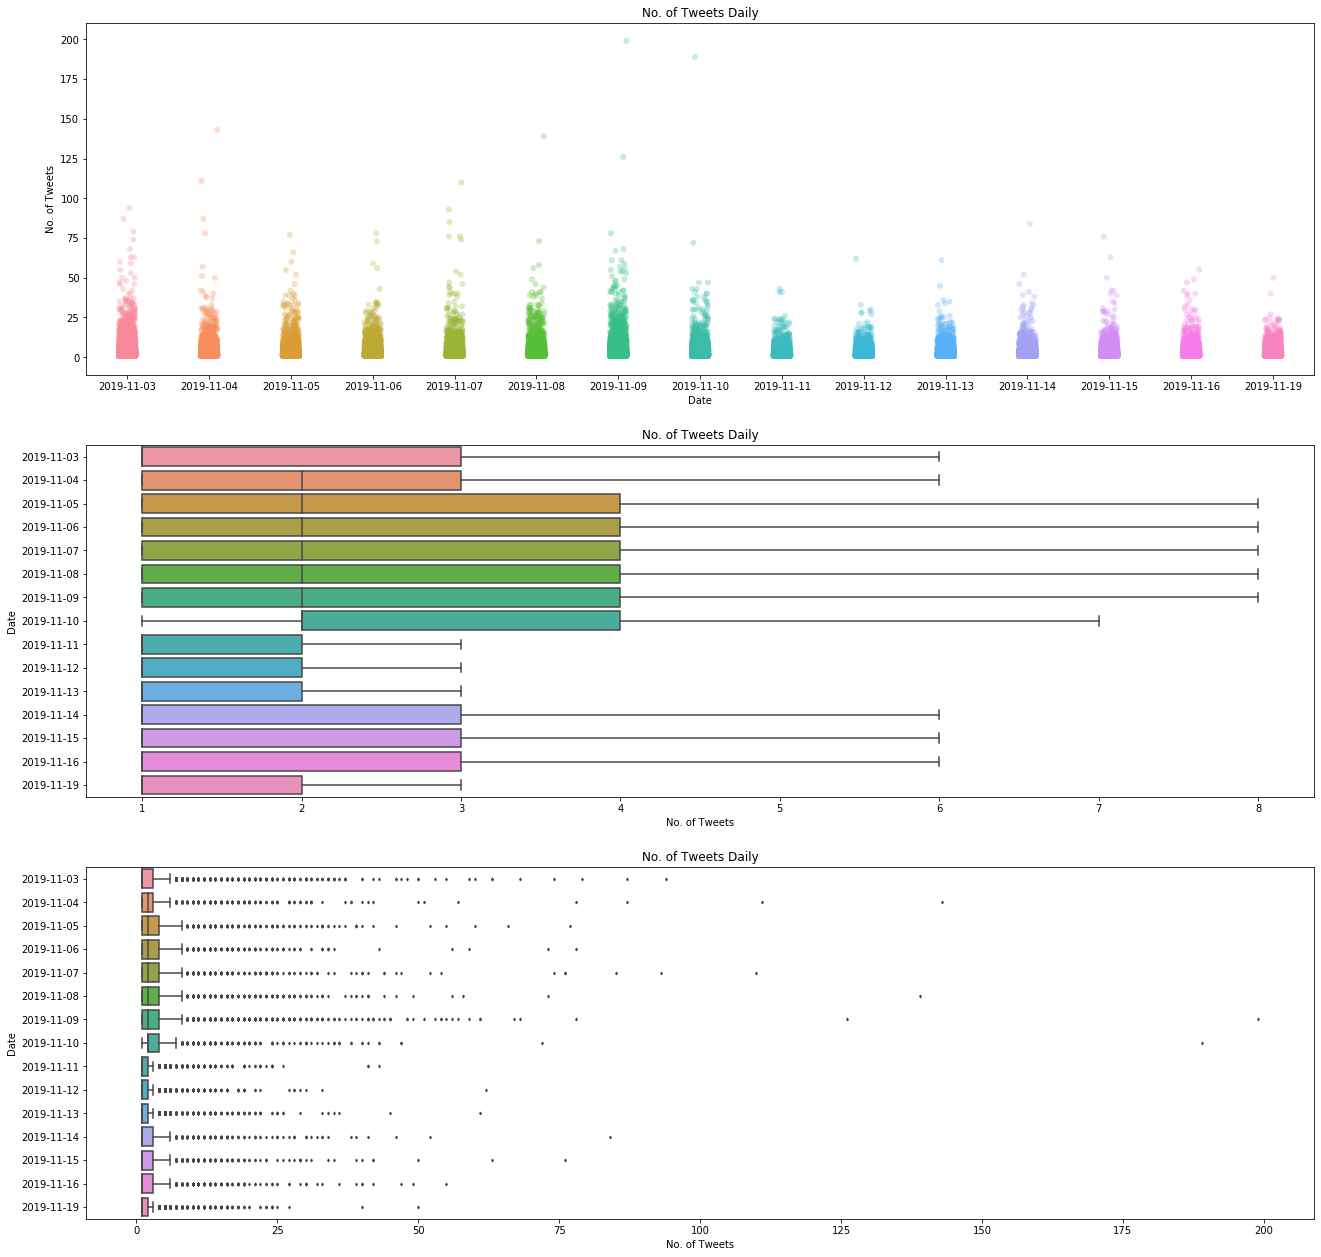

In [62]:
# hue = retweetcount and followers, totaltweets
f, axes = plt.subplots(3, 1, figsize = (22,22))
sns.set_palette('PuBuGn_d')
sns.stripplot(x = 'dt_date', y = 'noTweets', data = top_user_df, jitter = True, ax = axes[0], size = 6, alpha = 0.3)
sns.boxplot(y = 'dt_date', x = 'noTweets', data = top_user_df, orient = 'h', showfliers=False, ax = axes[1])
sns.boxplot(y = 'dt_date', x = 'noTweets', data = top_user_df, orient = 'h', showfliers=True, fliersize = 2.0, ax = axes[2])

# Axes and titles for each subplot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('No. of Tweets')
axes[0].set_title('No. of Tweets Daily')

axes[1].set_xlabel('No. of Tweets')
axes[1].set_ylabel('Date')
axes[1].set_title('No. of Tweets Daily')

axes[2].set_xlabel('No. of Tweets')
axes[2].set_ylabel('Date')
axes[2].set_title('No. of Tweets Daily')

plt.show()

From the seaborn boxplots and stripplot, we can see that most of the users in the dataset do not tweet a lot in a day. From the stripplot, we might not be able to discern the outliers in the dataset, and might think that most of the users tweeted in the range of 1 to 30 plus tweets daily. 

However, boxplots tell us a different story. The first boxplot at the middle of the visualization revealed, in fact, most users tweeted between 1 to 8 tweets. Whereas there are many outliers as shown in the second boxplot, at the bottom of the visualization. These users tweeted a lot, ranging from 10 onwards. There were at least 7 users who have tweeted at least more than 100 tweets per day in the timeframe considered.

#### Top 5 users with most number of tweets daily

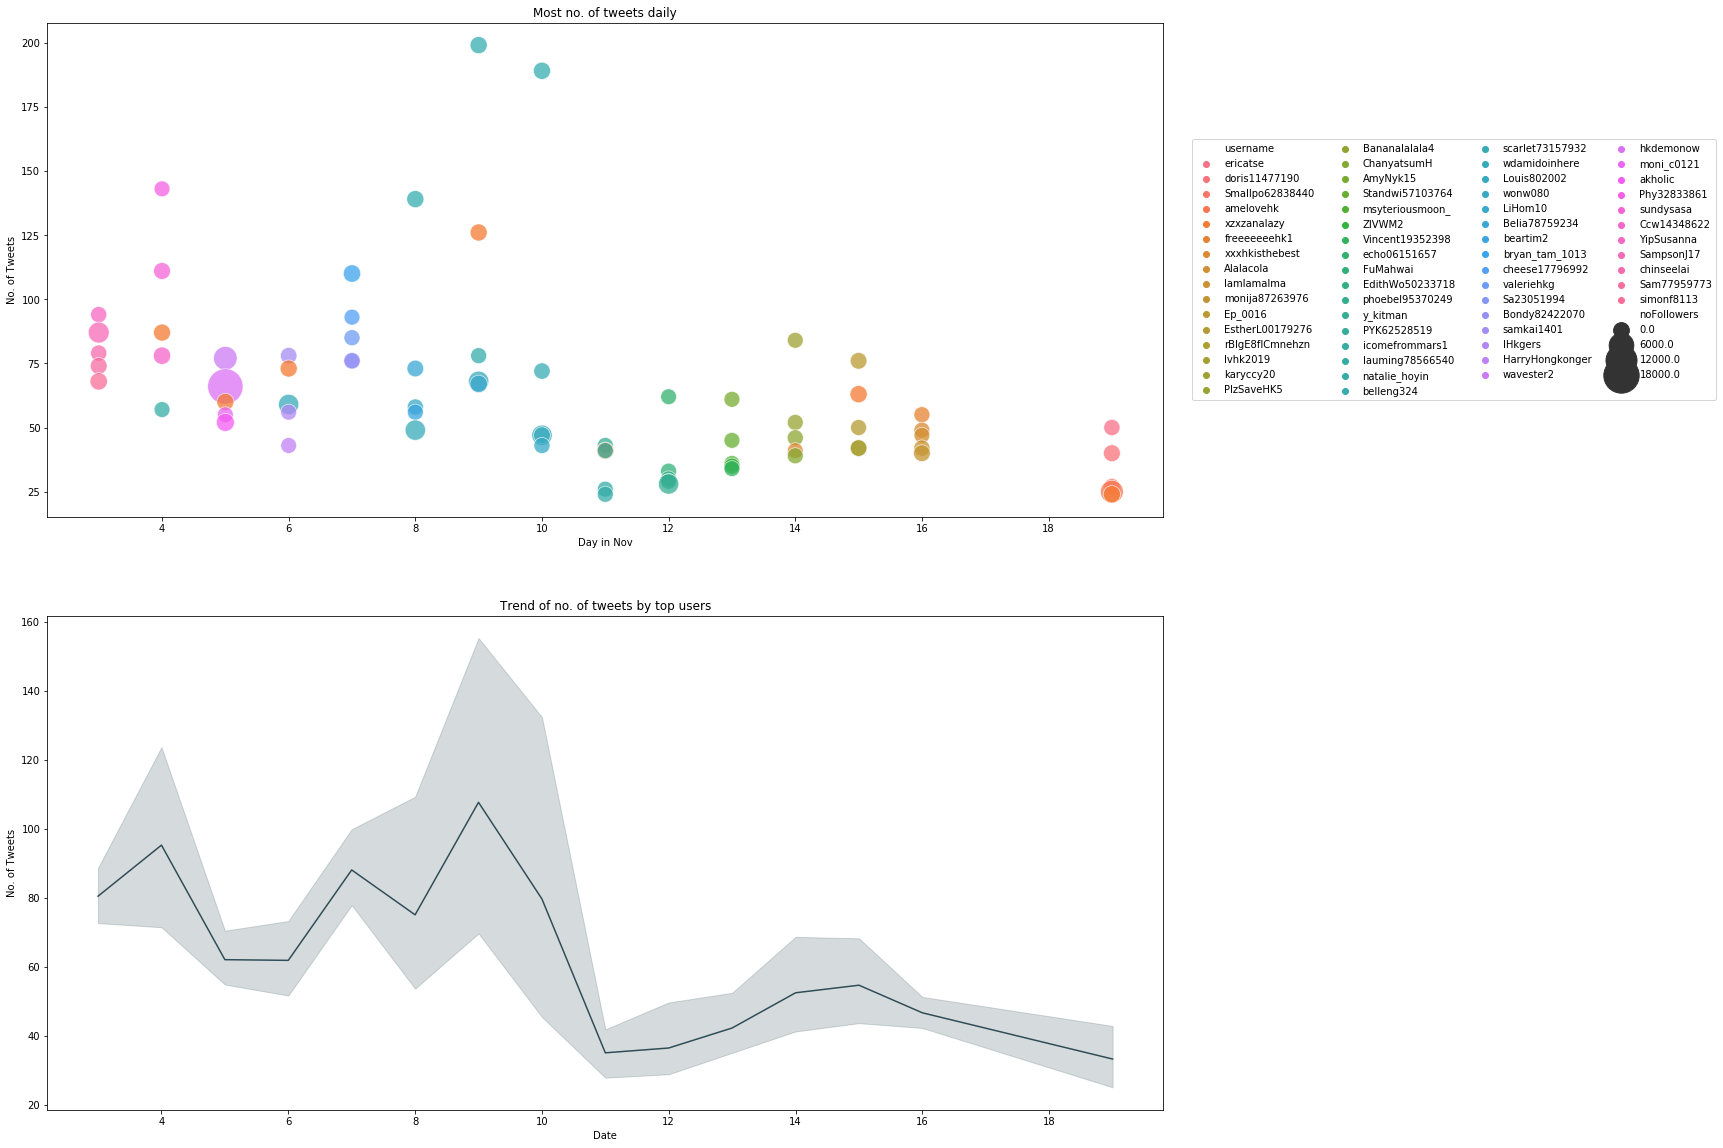

In [63]:
# To change the number of users, adjust the value in head()
# top_user_df.set_index(['dt_date', 'username']).sort_values(by = ['dt_date','noTweets'], ascending = False)
user_most_tweets_df = top_user_df.sort_values(by = ['dt_date', 'noTweets'], ascending = False, axis = 0).groupby('dt_date').head(5)

# Extract 'days' out of dt_date so we can plot a scatterplot
# Will return an int:
user_most_tweets_df['dayofNov'] = user_most_tweets_df['dt_date'].apply(lambda x: x.day)
user_most_tweets_df['noTweets'] = user_most_tweets_df['noTweets'].astype(int)

# Plot 2 subplots
# 1st subplot - show who are the users who tweeted the most
# 2nd subplot - trend in number of tweets
f, axes = plt.subplots(2, 1, figsize = (20,20))
f = sns.scatterplot(x = 'dayofNov', y = 'noTweets', hue = 'username', data = user_most_tweets_df, size = 'noFollowers', sizes = (250, 1250), alpha = 0.75, ax = axes[0])
sns.lineplot(x = 'dayofNov', y = 'noTweets', data = user_most_tweets_df, markers = True)

# Axes and titles for each subplot
# First subplot
axes[0].set_xlabel('Day in Nov')
axes[0].set_ylabel('No. of Tweets')
axes[0].set_title('Most no. of tweets daily')

# Legends for first subplot
box = f.get_position()
f.set_position([box.x0, box.y0, box.width * 1.0, box.height]) # resize position

# Put a legend to the right side
f.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=4)

# Second subplot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('No. of Tweets')
axes[1].set_title('Trend of no. of tweets by top users')


plt.show()

In [64]:
# Dataframe - Example of someone who tweeted the most:
# obtain username of this user first - we are using 9th nov
top_user_name = top_user_df[top_user_df['dt_date'].apply(lambda x: x.day) == 9].sort_values(by = 'noTweets', ascending=False)['username'].head(1).values[0]
print("Top user on 9th Nov 2019 is:",top_user_name)

# Print account description, if any
print('Account description, if any:',data[data['username'] == top_user_name][['username', 'acctdesc']]['acctdesc'].head(1).values[0])

# Obtain this particular username and the first top tweets by this user from the main dataframe 'data'
data[data['username'] == top_user_name][['username','text', 'tweetcreatedts']].head(5)

Top user on 9th Nov 2019 is: belleng324
Account description, if any: n.a


,username,text,tweetcreatedts
87618,belleng324,"#HongKong friends, read this. https://t.co/lMALaNoQ14",2019-11-08 16:43:09
88320,belleng324,"Citywide moment of silence to mourn for the tragic death of the university student who was suspiciously heavily injured during the protest in Tseung Kwan O.\n\nMay you rest in peace, Mr. Chow. We’ll carry you in our spirits. \n#RIP \n\n#HongKongProtests #JusticeForTszLok #JusticeForHK https://t.co/VVQg6TQpsO",2019-11-08 16:37:35
88347,belleng324,"11.08@Tsuen Wan\n#HKPolice fired tear gas at press from less than 2m away, whereas there were no protesters around at all\nSource: Apple Daily\n#HKPoliceBrutality #HKPoliceTerrorism #HKPoliceState #HKProtest #StandWithHongKong https://t.co/ohpYBvPiVY",2019-11-08 16:37:24
88440,belleng324,"Jimmy Sham, activist &amp; driving force behind #HongKong protests, has been brutally attacked by a group of men with hammers &amp; is in hospital. We call for an urgent investigation to bring perpetrators to justice. Attacks on activists must not be tolerated!",2019-11-08 16:36:35
88443,belleng324,"This is a horrific and brutal attack on Jimmy Sham, one of the driving forces behind #HongKong protests. \n\nWe're calling for an urgent investigation to bring the perpetrators to justice. Attacks on protesters must not be tolerated. https://t.co/fT8yZyoogo",2019-11-08 16:36:33


#### Accurate as of 13th Nov 2019:
1. From the first subplot entitled 'Most no. of tweets daily', we can identify who are the top users who tweeted the most. We also show a particular example on the top user for 9th Nov 2019. 
2. Together with the first subplot, the second subplot entitled 'Trend of no. of tweets by top users daily' revealed that the number of tweets tweeted by top users daily is decreasing in general over time. 
3. It is interesting to note that there seems to be a correlation, albeit a weak one, between the no. of tweets tweeted by top users daily and any major incidents during the movement. Around 8-9th Nov 2019, the number of tweets tweeted by the top user hit almost 200. The major event was the death of a Hong Kong university student who fell from a multi-storey carpark during a dispersion by the police. Around 4th Nov 2019, the major event was exactly the report of this incident.  

Sources:
- https://www.channelnewsasia.com/news/asia/hong-kong-protests-timeline-key-dates-anti-government-12082516
- https://www.channelnewsasia.com/news/asia/hong-kong-protests-prayer-vigil-alex-chow-death-lawmakers-arrest-12078718

### 6. Demographics of Twitter Users
#### Location of Twitter Users

In [65]:
location = data['location']
print('No. of distinct locations listed by twitter users is:', len(location.value_counts()))
unique_locations = location.value_counts()

# Remove n.a.
unique_locations = pd.DataFrame({'locations': unique_locations.index,
                                'count': unique_locations.values})
unique_locations.drop(0, inplace = True)

# See top few locations
unique_locations.sort_values(by = 'count', ascending = False).head(10)

No. of distinct locations listed by twitter users is: 6215


,locations,count
1,hong kong,49093
2,香港,6829
3,united states,1058
4,hk,912
5,hong kong,625
6,hongkong,439
7,canada,382
8,taiwan,349
9,"new york, usa",341
10,"london, england",314


Pretty natural to expect many of these users to claim to be residing in Hong Kong since these users are probably closer to the ground. Thus, they could spread news quickly from what they see in person. 

We will discount 'HongKong' from the visualization and focus on the distribution of the remaining locations:

In [66]:
# To remove 香港
hk_chinese_word = unique_locations.iloc[1,0]

# Obtain the row index of locations that contain hong kong:
ind_1 = unique_locations[unique_locations['locations'] == 'hong kong'].index.values[0]
ind_2 = unique_locations[unique_locations['locations'] == 'hk'].index.values[0]
ind_3 = unique_locations[unique_locations['locations'] == 'hong kong '].index.values[0]
ind_4 = unique_locations[unique_locations['locations'] == 'hongkong'].index.values[0]
ind_5 = unique_locations[unique_locations['locations'] == hk_chinese_word].index.values[0]
ind_6 = unique_locations[unique_locations['locations'] == 'kowloon city district'].index.values[0]

list_ind = [ind_1,ind_2,ind_3,ind_4,ind_5, ind_6]

# Drop these rows from unique_locations
unique_loc_temp = unique_locations.drop(list_ind)

/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/User

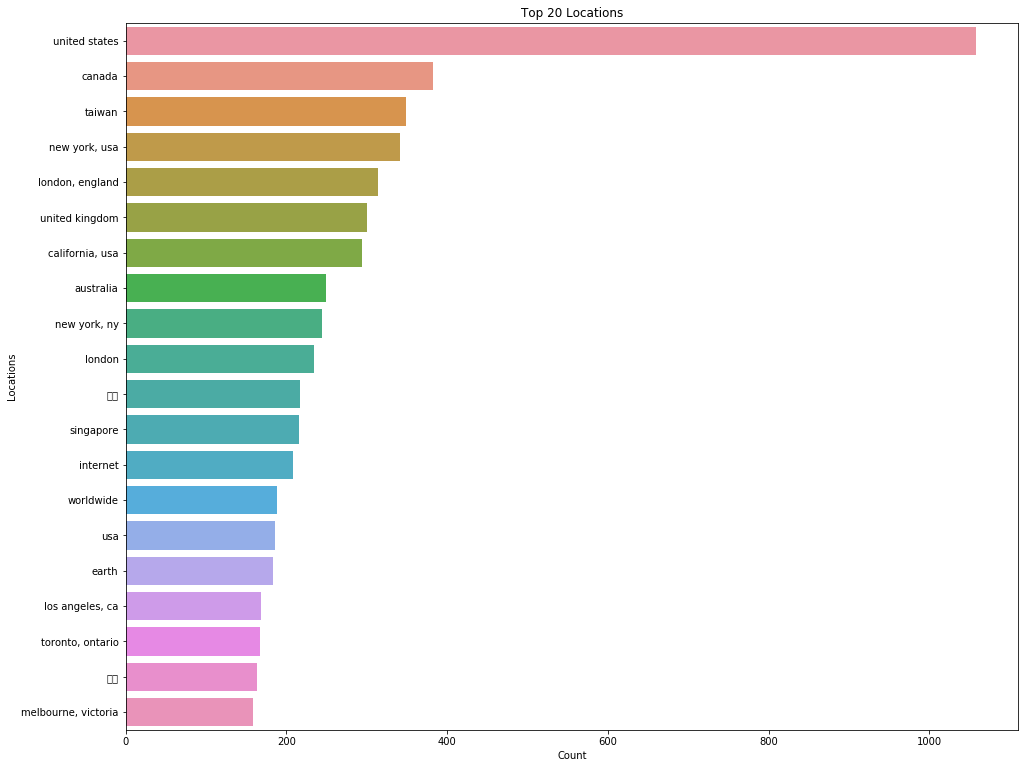

In [67]:
# Focus on top 20 locations first
# Convert any possible str to int/numeric first
count = pd.to_numeric(unique_loc_temp['count'])
unique_loc_temp['count'] = count
unique_loc_temp = unique_loc_temp.head(20)

# Plot a bar plot
plt.figure(figsize=(16,13))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'count', y = 'locations', orient = 'h',data = unique_loc_temp)
plt.xlabel('Count')
plt.ylabel('Locations')
plt.title('Top 20 Locations')
plt.show()

A quick counting of the top 20 locations, without hong kong, shows that majority of these locations come from the western world. We see the expected ones such as the United States, Canada, UK and Australia, where some people and politicians are also watching over the protest movement and speaking out against the ruling government and police. 

#### Follower Count
##### Top users with most followers

In [69]:
# Reuse code from top_user_df
# Sort according to noFollowers
top_user_df = top_user_df.sort_values(by = 'noFollowers', ascending = False)
user_most_followers = top_user_df.groupby('username')['noFollowers', 'dt_date'].max().sort_values(by = 'noFollowers', ascending = False)
user_most_followers['username'] = user_most_followers.index
user_most_followers.reset_index(inplace = True, drop = True)
user_most_followers

,noFollowers,dt_date,username
0,26193629.0,2019-11-19,BBCWorld
1,14177611.0,2019-11-19,CGTNOfficial
2,12642783.0,2019-11-09,XHNews
3,7065479.0,2019-11-15,PDChina
4,4274353.0,2019-11-14,ChinaDaily
...,...,...,...
51387,0.0,2019-11-13,gasvs_
51388,0.0,2019-11-13,HK4freedom
51389,0.0,2019-11-13,gb3a13a
51390,0.0,2019-11-09,HK42929919


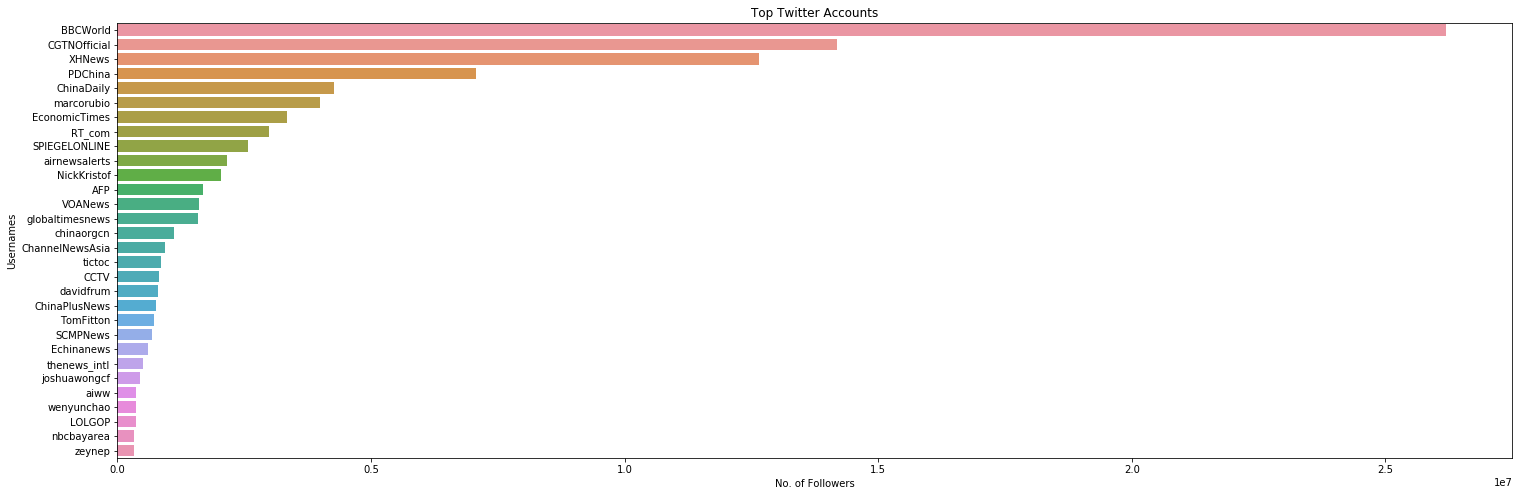

In [70]:
# plot
plt.figure(figsize = (25, 8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'noFollowers', y = 'username', orient = 'h', data = user_most_followers.head(30))
plt.xlabel('No. of Followers')
plt.ylabel('Usernames')
plt.title('Top Twitter Accounts')
plt.show()

##### Acitivity of Top Accounts

In [71]:
user_most_followers_daily = top_user_df.sort_values(by = ['dt_date', 'noFollowers'], ascending = False, axis = 0).groupby('dt_date').head(5)
print(user_most_followers_daily)

# Extract 'days' out of dt_date so we can plot a scatterplot
# Will return an int:
user_most_followers_daily['dayofNov'] = user_most_followers_daily['dt_date'].apply(lambda x: x.day)
user_most_followers_daily['noFollowers'] = user_most_followers_daily['noFollowers'].astype(int)

           username noTweets  noFollowers     dt_date
284   BBCWorld       1        26193629.0   2019-11-19
410   CGTNOfficial   1        14148818.0   2019-11-19
2513  SPIEGELONLINE  1        2578743.0    2019-11-19
6089  tictoc         1        857903.0     2019-11-19
2845  TomFitton      1        716396.0     2019-11-19
...         ...     ..             ...            ...
829   ChinaDaily     1        4274353.0    2019-11-03
3413  RT_com         1        2983379.0    2019-11-03
4645  airnewsalerts  1        2169399.0    2019-11-03
1190  Echinanews     1        597933.0     2019-11-03
7607  nbcbayarea     1        329697.0     2019-11-03

[75 rows x 4 columns]


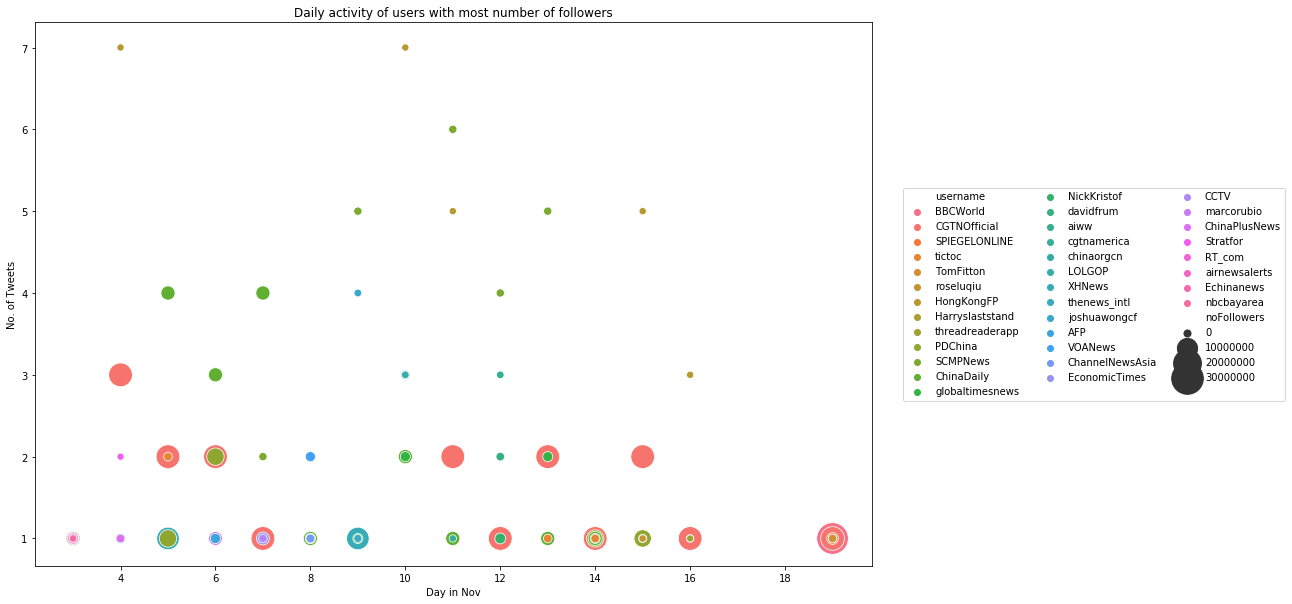

In [72]:
f, axes = plt.subplots(1, 1, figsize = (15,10))
f = sns.scatterplot(x = 'dayofNov', y = 'noTweets', hue = 'username',data = user_most_followers_daily, size = 'noFollowers', sizes=(50, 1000))

# Axes and titles for each subplot
# First subplot
axes.set_xlabel('Day in Nov')
axes.set_ylabel('No. of Tweets')
axes.set_title('Daily activity of users with most number of followers')

# Legends for first subplot
box = f.get_position()
f.set_position([box.x0, box.y0, box.width * 1, box.height]) # resize position

# Put a legend to the right side
f.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=3)

### 7. Most Mentioned Username 

Might there be figureheads in the protest movements that can be discovered in these tweets? Twitter users might be tagging these people to maybe inform them of events that are happening on the ground and hence, require their attentions. These figureheads or prominent figures might be lawyers, lawmakers, politicians, reporters and protest leaders who are supportive of the pro-democracy movement. 

In [73]:
def find_users(df):
    # df: dataframe to look at
    # returns a list of usernames
    
    # Create empty list
    list_users = []
    
    for i in range(0, len(df)):
        users_ith_text = re.findall('@[^\s]+', df.iloc[i,:]['text'])
        # returns a list
        # append to list_users by going through a for-loop:
        for j in range(0, len(users_ith_text)):
            list_users.append(users_ith_text[j])
    
    return list_users

In [74]:
# Apply on dataframe data['text']
list_users = find_users(data)

mentioned_users_df = pd.DataFrame({
    'mentioned_users': list_users
})

mentioned_users_df.head()

,mentioned_users
0,@hkgetv
1,@SenateMajLdr
2,@SolomonYue
3,@SenRickScott
4,@seariousforhkg


In [75]:
mentionedusers = mentioned_users_df.groupby('mentioned_users').size().reset_index(name = 'totalcount').sort_values(by = 'totalcount', ascending = False)
mentionedusers.head()

,mentioned_users,totalcount
2209,@SolomonYue,6153
3706,@joshuawongcf,3652
3912,@marcorubio,2852
3438,@hk_watch,2656
2942,@business,2607


/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/griffin/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0, flags=flags)


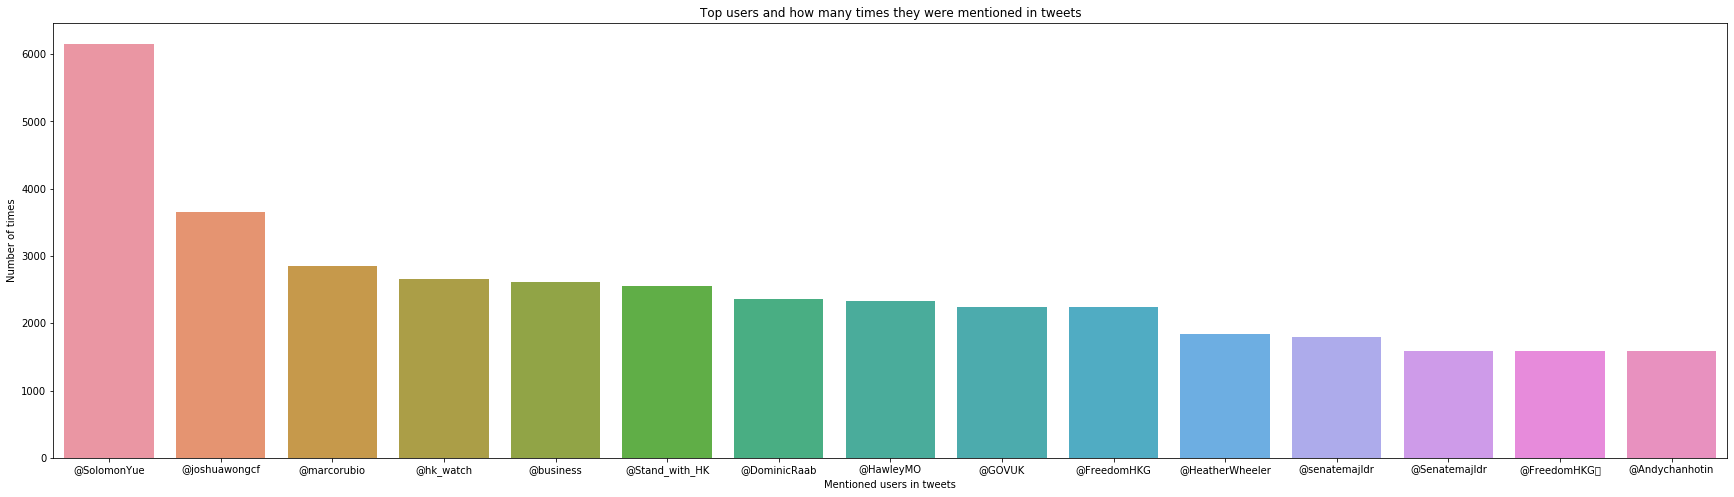

In [76]:
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'mentioned_users', y = 'totalcount', data = mentionedusers.head(15))
plt.xlabel('Mentioned users in tweets')
plt.ylabel('Number of times')
plt.title('Top users and how many times they were mentioned in tweets')
plt.show()

Most of the 15 most mentioned users, if not all, are directly related to Hong Kong and the protest movements. In particular, a quick google search on each of these users will return queries that show that they are either supportive of the protesters and protests and/or against the Hong Kong Administration and the police force.
In summary:
1. @SolomonYue - a Chinese American politician related to the Hong Kong Human Rights and Democracy Act passed in the U.S
2. @joshuawongcf - a local protest leader who was planning to take part in the elections but was banned.
3. @GOVUK - threatens to sanction hong kong officials over their handling of the protest
4. @HawleyMO - a U.S politician
5. @HeatherWheeler - Minister for Asia and the Pacific who sent a letter to Hong Kong government officials on the proposed sanctions.

With the above bar chart, we have come to the end of this section where we have visualized information from tweets in the dataset. 


All in all, more than 200k tweets over a period of at least 10 days starting from 3rd Nov 2019, we want to know what is the general sentiment of tweets over a period of time. e.g. daily, weekly etc. The rudimentary sentiment analysis that we did above using the Vader Library from NLTLK revealed plenty of false positives -  upon closer inspection of these random tweets that were rated to be positive towards the government and police, they turned out to be either negative towards them or supportive towards the protesters' cause. Hence, we need to turn to deep learning to give us better results. The section on deep learning will be continued on a separate notebook.